<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Аналитика маркетинговых данных Яндекс.Афиши.** <br>
Задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.



**Описание проекта**<br/>
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.<br/><br/>
<b>Необходимо изучить:</b><br/>
как клиенты пользуются сервисом,<br/>
когда делают первые покупки на сайте,<br/>
сколько денег приносит компании каждый клиент,<br/>
когда расходы на привлечение клиента окупаются.<br/>
Выручка измеряется в условных единицах — у.е.<br/><br/>
<b>Необходимо посчитать метрики трёх видов:</b><br/>
продуктовые,<br/>
метрики электронной коммерции,<br/>
маркетинговые.<br/><br/>
<b>Пути к файлам:</b><br/>
визиты: /datasets/visits_log.csv <br/>
заказы: /datasets/orders_log.csv <br/>
расходы: /datasets/costs.csv<br/><br/>
<b>Описание данных</b><br/>
Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.<br/>
Структура visits_log.csv<br/>
Uid — уникальный идентификатор пользователя,<br/>
Device — категория устройства пользователя,<br/>
Start Ts — дата и время начала сессии,<br/>
End Ts — дата и время окончания сессии,<br/>
Source Id — идентификатор источника перехода на сайт.<br/>
Структура orders_log.csv<br/>
Uid — уникальный идентификатор пользователя,<br/>
Buy Ts — дата и время заказа,<br/>
Revenue — сумма заказа.<br/>
Структура costs.csv<br/>
source_id — идентификатор рекламного источника,<br/>
dt — дата проведения рекламной кампании,<br/>
costs — расходы на эту кампанию.<br/>

<a name="contents"></a><br/>
<a name="chapter_0"></a>    
**Содержание**<br/>
[**1. Изучение данных из представленного файла данных**](#chapter_1.)<br/>
[1.1. Выставление окружения и импорт библиотек.](#chapter_1.1.)<br/> 
[1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера.](#chapter_1.2.)<br/>
[1.3. Описание данных, начальное.](#chapter_1.3.)<br/>
[1.4. Краткие выводы по структуре датасета.](#chapter_1.4.)<br/>

[**2. Изучение данных конкретных столбцов и предобработка данных**](#chapter_2.)<br/>
[2.1. Таблица visits_log_data.](#chapter_2.1.)<br/>
[2.2. Таблица orders_log_data.](#chapter_2.2.)<br/>
[2.3. Таблица costs_data.](#chapter_2.3.)<br/>
    
[**3. Исследовательский анализ данных.**](#chapter_3.)    
[<b>3.1. Продуктовые метрики.</b>](#chapter_3.1.)<br/>
[3.1.1. Исследование DAU, WAU и MAU.](#chapter_3.1.1.)<br/>
[3.1.2. Исследование количества сессий по отчетному периоду.](#chapter_3.1.2.)<br/>
[3.1.3. Исследование времени, которое пользователи проводят на сайте.](#chapter_3.1.3.)<br/>
[3.1.4. Retention Rate и когортный анализ.](#chapter_3.1.4.)<br/>
[<b>3.2. Метрики электронной коммерции.</b>](#chapter_3.2.)<br/> 
[3.2.1. Исследование метрики среднего времени с момента первого посещения сайта до совершения покупки.](#chapter_3.2.1.)<br/>
[3.2.2. Cреднее количество покупок на одного покупателя за определённый период.](#chapter_3.2.2.)<br/>
[3.2.3. Cредний чек.](#chapter_3.2.3.)<br/>
[3.2.4. LTV на покупателя по когортам.](#chapter_3.2.4.)<br/>
[<b>3.3. Маркетинговые метрики.</b>](#chapter_3.3.)<br/> 
[3.3.1. Общая сумма расходов на маркетинг.](#chapter_3.3.1.)<br/>
[3.3.2. Средний CAC на одного покупателя для всего проекта и для каждого источника трафика.](#chapter_3.3.2.)<br/>
[3.3.3. ROMI по когортам в разрезе источников.](#chapter_3.3.3.)<br/>


[**4. Выводы**](#chapter_4.) 

<a name="chapter_1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1. Изучение данных из представленного файла данных.</b> <br/>
</div>


<a name="chapter_1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.1. Выставление окружения и импорт библиотек.</b> <br/>
</div>

1.1.1. Вначале посмотрим окружение тренажера Яндекс.Практикума с помощью команды ` !conda list -e ` и получаем такой результат по необходимым нам библиотекам:

1.1.2. Смотрим окружение на своей локальной машине:

In [1]:
#!conda list -e

1.1.3. Делаем импорт библиотек, используемых в курсе, и сделаем запрос на обновление основной библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

import numpy as np

import math as mt
from math import factorial

import scipy.stats
from scipy.stats import norm
from scipy import stats as st

import seaborn as sns                 # подождем пока, лучше позже, потому как при этом меняется вид обычных гистограмм
sns.set(color_codes=True)

import copy #импорт библиотеки по копированию Источник: https://pythononline.ru/osnovy/modul-copy-python

import requests  # Импорт библиотеки для запросов к серверу
from bs4 import BeautifulSoup  # Импорт библиотеки для автоматического парсинга странички

import re

#import warnings                       # предупреждения пока будем оставлять
#warnings.filterwarnings("ignore")



In [3]:
#!pip install pandas -U

#!conda list pandas
#!pip install pandas==1.2.4 # инсталлировал версию 1.2.4 С версией 1.3.3 - не совсем правильно рисовалась легенда графиков
!conda list pandas

# packages in environment at C:\Users\Tachkov\anaconda3:
#
# Name                    Version                   Build  Channel
pandas                    1.4.1                    pypi_0    pypi


1.1.4. Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [4]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 


<a name="chapter_1.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера.</b> <br/>
</div>

In [5]:
try:
    visits_log_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/visits_log.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    visits_log_data = pd.read_csv('/datasets/visits_log.csv')
    
try:
    orders_log_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/orders_log.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    orders_log_data = pd.read_csv('/datasets/orders_log.csv')
    
try:
    costs_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/costs.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    costs_data = pd.read_csv('/datasets/costs.csv')



1.2.1.Отсмотрим последовательно эти датасеты

In [6]:
visits_log_data.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
orders_log_data.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
costs_data.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
for data in [visits_log_data, orders_log_data, costs_data]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     -------------

In [10]:
for data in [visits_log_data, orders_log_data, costs_data]: 
    missing_values = data.isnull().sum()
    display(missing_values)


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

source_id    0
dt           0
costs        0
dtype: int64

In [11]:
for data in [visits_log_data, orders_log_data, costs_data]: 
    display(data.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Device,359400,2,desktop,262567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Ts,359400,224760,2017-11-24 16:51:00,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Id,359400.00,NaN,NaN,NaN,3.75,1.92,1.00,3.00,4.00,5.00,10.00
Start Ts,359400,224303,2017-11-24 16:06:00,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uid,359400.00,NaN,NaN,NaN,9202556994354921472.00,5298432824659611648.00,11863502262781.00,4613406732167550976.00,9227412908740601856.00,13728237011236171776.00,18446676030785673216.00


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buy Ts,50415,45991,2018-05-31 10:13:00,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,50415.00,NaN,NaN,NaN,5.00,21.82,0.00,1.22,2.50,4.89,2633.28
Uid,50415.00,NaN,NaN,NaN,9098160634289729536.00,5285741550834715648.00,313578113262317.00,4533566627250599936.00,9102273602618561536.00,13682901980465401856.00,18446167067214817280.00


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_id,2542.00,NaN,NaN,NaN,4.86,3.18,1.00,2.00,4.00,9.00,10.00
dt,2542,364,2017-06-01,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costs,2542.00,NaN,NaN,NaN,129.48,156.30,0.54,21.95,77.30,170.06,1788.28


 <a name="chapter_1.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.3. Описание данных, начальное.</b> <br/>
</div>

Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта,<br/>
orders_log.csv — информацию о заказах,<br/>
costs.csv — информацию о расходах на маркетинг.<br/><br/>
<b>Структура visits_log.csv</b><br/>
Uid — уникальный идентификатор пользователя,<br/>
Device — категория устройства пользователя,<br/>
Start Ts — дата и время начала сессии,<br/>
End Ts — дата и время окончания сессии,<br/>
Source Id — идентификатор источника перехода на сайт.<br/><br/>
<b>Структура orders_log.csv</b><br/>
Uid — уникальный идентификатор пользователя,<br/>
Buy Ts — дата и время заказа,<br/>
Revenue — сумма заказа.<br/><br/>
<b>Структура costs.csv</b><br/>
source_id — идентификатор рекламного источника,<br/>
dt — дата проведения рекламной кампании,<br/>
costs — расходы на эту кампанию.<br/>

<a name="chapter_1.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.4. Краткие выводы по структуре​ датасета.</b> <br/>
</div>

- в массиве visits_log_data есть данные о 359400 клиентских сессиях;

- в массиве orders_log_data есть данные о 50415 покупках;

- в массиве costs_data есть данные о 2542 рекламных акциях;

- пропусков нет, данные массивов вполне корректные;

- типы данных тоже вполне нормальные object, int64, uint64 и float64. На такого размера таблицах нет смысла бороться за уменьшение объема памяти;

- у Start Ts, End Ts, Buy Ts и dt придется менять тип данных на формат datetime;

- названия столбцов также приведем к строчным и к единому виду, где необходимо.
- большое стандартное отклонение Revenue (std=21.82 при среднем в 5.00)  и диапазон значений Revenue от 0 до 2633.28. Если учесть, что это в у.е., то надо отдельно посмотреть внимательнее на того, кто делает такой крупный заказ ))
- судя по всему, во временных столбцах не пишутся секунды. Стало быть, можно продолжительность создавать в минутах, но вначале это проверим.
   

<a name="chapter_2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2. Изучение данных конкретных столбцов и предобработка данных.</b> <br/>
</div>

<a name="chapter_2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1. Таблица visits_log_data.</b> <br/>
</div>

Получим названия столбцов, чтобы удобнее было их менять

In [12]:
display(visits_log_data.columns) # названия столбцов нашего файла

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

Подредактируем сразу эти названия - и для удобства и для дальнейшего корректного объединения таблиц

In [13]:
columns_new = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits_log_data.set_axis(columns_new, axis='columns', inplace=True)
display(visits_log_data.head(5)) # и сразу проверим

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Переведем end_ts и start_ts в datetime

In [14]:
visits_log_data['end_ts'] = pd.to_datetime(visits_log_data['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log_data['start_ts'] = pd.to_datetime(visits_log_data['start_ts'], format='%Y-%m-%d %H:%M:%S')
#display(visits_log_data.head(5)) # и сразу проверим
visits_log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [15]:
visits_log_data.loc[visits_log_data.duplicated(keep=False)].sort_values('uid') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,device,end_ts,source_id,start_ts,uid


In [16]:
print('Дубликатов:', visits_log_data.duplicated().sum())

Дубликатов: 0


Дубликатов тоже не видно

Начнем смотреть последовательно столбцы по отдельности

In [17]:
visits_log_data['device'].value_counts(dropna=False) # ставим значение False для параметра dropna, чтобы учесть возможные NaN, хотя их вроде и нет

desktop    262567
touch       96833
Name: device, dtype: int64

Не совсем для меня понятное разделение, почему только два наименования? Но по крайней мере других названий нет.

Не вижу необходимости, но для красоты процесса произведем очистку ))

In [18]:
visits_log_data['device'] = visits_log_data['device'].str.replace('^ +| +$', '', regex=True) # Заменить пробел на обоих концах : через регулярное выражение
visits_log_data['device'] = visits_log_data['device'].str.replace('  ', '', regex=True) # заменить два пробела

In [19]:
visits_log_data['end_ts'].value_counts(dropna=False)

2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:40:00    14
                       ..
2017-09-25 09:03:00     1
2017-06-22 00:41:00     1
2018-05-09 02:12:00     1
2018-02-10 17:24:00     1
2017-09-10 13:13:19     1
Name: end_ts, Length: 224760, dtype: int64

In [20]:
visits_log_data['start_ts'].value_counts(dropna=False)

2017-11-24 16:06:00    19
2018-05-31 10:01:00    15
2017-11-24 17:21:00    15
2017-11-24 17:19:00    15
2017-11-24 15:57:00    14
                       ..
2017-11-02 14:13:00     1
2018-04-07 13:27:00     1
2018-03-04 16:33:00     1
2018-04-30 17:59:00     1
2017-09-10 13:13:00     1
Name: start_ts, Length: 224303, dtype: int64

In [21]:
visits_log_data['source_id'].value_counts(dropna=False)

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

А расшифровки источников трафика-то у нас и нет. 6 и 7 - совсем редкие... И всего 9 источников трафика

In [22]:
visits_log_data['uid'].value_counts(dropna=False)

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
1697418453653713497       1
14532781892786232034      1
16822398512734559234      1
18366668012474472627      1
3266363999948772866       1
Name: uid, Length: 228169, dtype: int64

Есть активные пользователи. Надеюсь, из логов удалены записи сотрудников самой Афиши ))

Столбцы с датами проще проверить, если сразу создадим столбец с продолжительностью сессии, сделаем в секундах.

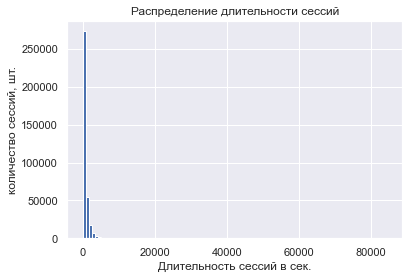

In [23]:
visits_log_data['duration_ts'] = (visits_log_data['end_ts'] - visits_log_data['start_ts']).dt.seconds #посчитайте продолжительность сессий
visits_log_data['duration_ts'].hist(bins=100)
plt.xlabel('Длительность сессий в сек.')
plt.ylabel('количество сессий, шт.')
plt.title('Распределение длительности сессий');

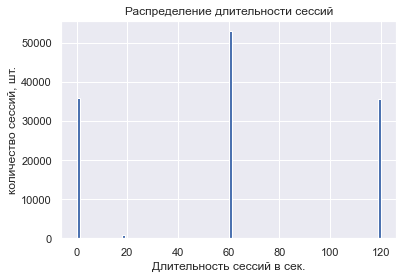

In [24]:
visits_log_data['duration_ts'].hist(bins=100, range = (0, 120))
plt.xlabel('Длительность сессий в сек.')
plt.ylabel('количество сессий, шт.')
plt.title('Распределение длительности сессий');


In [25]:
artefact_stat = visits_log_data.loc[(visits_log_data['duration_ts'] > 0) & (visits_log_data['duration_ts'] < 60)]
display(artefact_stat.head(10)) 
len(artefact_stat)

,device,end_ts,source_id,start_ts,uid,duration_ts
358532,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2551852515556206,19
358533,touch,2018-01-26 19:14:19,1,2018-01-26 19:14:00,21801295586117262,19
358534,desktop,2017-07-14 15:43:19,1,2017-07-14 15:43:00,45173250638993302,19
358535,touch,2017-10-04 12:51:19,4,2017-10-04 12:51:00,74720860360798980,19
358536,desktop,2018-03-25 16:00:19,9,2018-03-25 16:00:00,86768018446815478,19
358537,desktop,2017-12-07 19:30:19,1,2017-12-07 19:30:00,164003844353206448,19
358538,desktop,2017-06-22 13:16:19,2,2017-06-22 13:16:00,180158750434420043,19
358539,touch,2017-08-04 20:36:19,2,2017-08-04 20:36:00,221880711661164670,19
358540,desktop,2017-12-13 09:19:19,4,2017-12-13 09:19:00,293253779830679371,19
358541,desktop,2017-10-07 10:29:19,2,2017-10-07 10:29:00,302132503959654911,19


868

И есть продолжительность в загадочные 19 секунд, 868 случаев. Интересно, а как найти все данные, не кратные 60 сек?

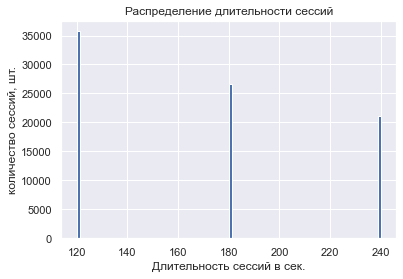

In [26]:
visits_log_data['duration_ts'].hist(bins=100, range = (120, 240))
plt.xlabel('Длительность сессий в сек.')
plt.ylabel('количество сессий, шт.')
plt.title('Распределение длительности сессий');

Давайте поищем еще подобные до границы в 5 минут, далее они уже не актуальные.

In [27]:
artefact_stat = visits_log_data.loc[
    ((visits_log_data['duration_ts'] > 0) & (visits_log_data['duration_ts'] < 60)
    ) | ((visits_log_data['duration_ts'] > 60) & (visits_log_data['duration_ts'] < 120)
    ) | ((visits_log_data['duration_ts'] > 120) & (visits_log_data['duration_ts'] < 180)
        ) | ((visits_log_data['duration_ts'] > 180) & (visits_log_data['duration_ts'] < 240)
            ) | ((visits_log_data['duration_ts'] > 240) & (visits_log_data['duration_ts'] < 300))]
len(artefact_stat)

868

In [28]:
visits_log_data['duration_ts'].value_counts(dropna=False)

60       53029
0        35794
120      35748
180      26672
240      21085
         ...  
17820        1
18480        1
14340        1
23400        1
16320        1
Name: duration_ts, Length: 312, dtype: int64

В логи, преимущественно -  не писались секунды. И есть артефакт в количестве 868 случаев с длительностью на длительностях не более 5 минут.

Об артефактах можно и сообщить технарям. В данном случае, природа этого артефакта не совсем понятна и я бы оставил эту проблему живой до объединения таблиц. А там бы посмотрел, что собой представляют эти заходы с полными данными, может что-то и прояснится. Пока видим, что это разные даты и разные часы.


И хотелось бы диапазон дат сразу установить и диапазон данных по продолжительности.

In [29]:
visits_log_data['start_ts'].describe(datetime_is_numeric = True) # жаль, что не будет такой возможности в будущем.
# datetime_is_numeric = True - для отключения предупреждения

count                           359400
mean     2017-12-18 06:17:32.010517760
min                2017-06-01 00:01:00
25%                2017-10-15 09:41:00
50%                2017-12-18 18:46:00
75%                2018-02-28 09:54:00
max                2018-05-31 23:59:00
Name: start_ts, dtype: object

Получается, ровно год у нас в периоде

In [30]:
visits_log_data['end_ts'].describe(datetime_is_numeric = True) # жаль, что не будет такой возможности в будущем.
# datetime_is_numeric = True - для отключения предупреждения

count                           359400
mean     2017-12-18 06:28:15.036205056
min                2017-06-01 00:02:00
25%                2017-10-15 09:45:45
50%                2017-12-18 18:59:30
75%                2018-02-28 10:08:15
max                2018-06-01 01:26:00
Name: end_ts, dtype: object

In [31]:
visits_log_data['duration_ts'].describe(datetime_is_numeric = True) # жаль, что не будет такой возможности в будущем.
# datetime_is_numeric = True - для отключения предупреждения

count   359400.00
mean       643.51
std       1016.33
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      84480.00
Name: duration_ts, dtype: float64

Отрицательных по длительности сессий нет, что уже хорошо ))

Сессия в 84480 секунд, что равно 23,47 часа - тоже может быть не совсем корректным вариантом.



<a name="chapter_2.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.2. Таблица orders_log_data.</b> <br/>
</div>

In [32]:
display(orders_log_data.columns) # названия столбцов нашего файла

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

Редактируем названия столбцов

In [33]:
columns_new = ['buy_ts', 'revenue', 'uid']
orders_log_data.set_axis(columns_new, axis='columns', inplace=True)
display(orders_log_data.head(5)) # и сразу проверим

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Переведем buy_ts в формат datetime

In [34]:
orders_log_data['buy_ts'] = pd.to_datetime(orders_log_data['buy_ts'], format='%Y-%m-%d %H:%M:%S')
#display(orders_log_data.head(5)) # и сразу проверим
orders_log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [35]:
orders_log_data.loc[orders_log_data.duplicated(keep=False)].sort_values('uid') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,buy_ts,revenue,uid


Дубликатов не видим.

Посмотрм на распределения

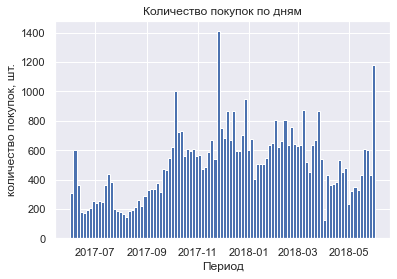

In [36]:
orders_log_data['buy_ts'].hist(bins=100)
#orders_log_data['buy_ts'].hist(bins=100, range = (120, 240))
plt.xlabel('Период')
plt.ylabel('количество покупок, шт.')
plt.title('Количество покупок по дням');

Распределение не совсем похоже на те, что видел ранее - не видно таких ярких явных пиков на школьные каникулы, более сглажено.

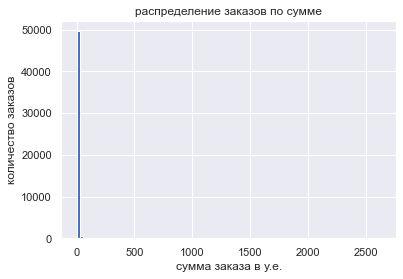

In [37]:
orders_log_data['revenue'].hist(bins=100)
#orders_log_data['revenue'].hist(bins=100, range = (0, 100))
plt.xlabel('сумма заказа в у.е.')
plt.ylabel('количество заказов')
plt.title('распределение заказов по сумме');

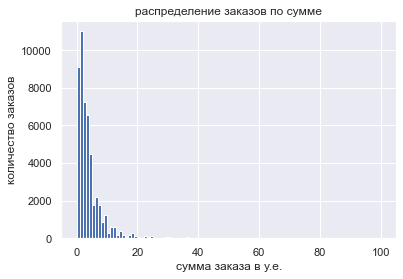

In [38]:
#orders_log_data['revenue'].hist(bins=100)
orders_log_data['revenue'].hist(bins=100, range = (0, 100))
plt.xlabel('сумма заказа в у.е.')
plt.ylabel('количество заказов')
plt.title('распределение заказов по сумме');

Ну и посмотрим, как все это в числах

In [39]:
orders_log_data.describe(datetime_is_numeric = True) 
# datetime_is_numeric = True - для отключения предупреждения

,buy_ts,revenue,uid
count,50415,50415.00,50415.00
mean,2017-12-20 05:14:24.846176768,5.00,9098160634289729536.00
min,2017-06-01 00:10:00,0.00,313578113262317.00
25%,2017-10-13 17:28:00,1.22,4533566627250599936.00
50%,2017-12-21 14:12:00,2.50,9102273602618561536.00
75%,2018-03-02 16:10:00,4.89,13682901980465401856.00
max,2018-06-01 00:02:00,2633.28,18446167067214817280.00
std,NaN,21.82,5285741550834715648.00


In [40]:
orders_log_data['revenue'].sum()

252057.19999999998

Средняя покупка в 5 у.е. и максимальная в 2633,28 у.е. Общая сумма покупок 252057,2 у.е.

А что это у нас за покупки с нулевой суммой?

И отметим, что у нас период заканчивается 01.06.2018 и есть сколько-то покупок в этот день. Для графиков будет более корректно, если мы не будем считать по июню 2018, не забудем ограничить массив в этом случае.

In [41]:
orders_log_data['revenue'].value_counts(dropna=False)

1.83     2552
2.44     2464
3.67     2421
1.22     2216
3.05     2041
         ... 
0.91        1
4.92        1
3.37        1
9.89        1
92.89       1
Name: revenue, Length: 1149, dtype: int64

In [42]:
orders_log_data['buy_ts'].value_counts(dropna=False)

2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2017-11-24 17:36:00    7
2018-05-31 10:27:00    7
2018-05-31 10:02:00    7
                      ..
2017-11-09 22:42:00    1
2017-11-09 22:45:00    1
2017-11-09 22:46:00    1
2017-11-09 22:56:00    1
2018-06-01 00:02:00    1
Name: buy_ts, Length: 45991, dtype: int64

In [43]:
orders_log_data['uid'].value_counts(dropna=False)

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
1039442909910620438       1
42362552951081637         1
8069118931487899422       1
17649287249444736221      1
83872787173869366         1
Name: uid, Length: 36523, dtype: int64

Да, есть у нас активные покупатели! Целых 239 покупок у самого активного!

И смотрим покупки с нулевой суммой:

In [44]:
revenue_0 = orders_log_data.query('revenue == 0')
display(revenue_0.head(5))
len(revenue_0)

,buy_ts,revenue,uid
1802,2017-06-22 18:19:00,0.00,17030528792926543083
2787,2017-07-07 15:54:00,0.00,10281425020415612933
4783,2017-08-02 14:54:00,0.00,184148767273119549
5095,2017-08-09 14:48:00,0.00,5603453646174104178
5863,2017-08-23 13:43:00,0.00,5603453646174104178


51

Нулевые покупки в количестве 51 штуки зафиксированы в разные дни и часы. Причина появления непонятна, может быть технической. Может образоваться, например, и после возврата билетов. Просто пока запомним этот факт.

In [45]:
display(orders_log_data[orders_log_data['buy_ts'] >= '2018-06-01'])

,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


Всего одна покупка в эту дату 2018-06-01

<a name="chapter_2.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.3. Таблица costs_data.</b> <br/>
</div>

In [46]:
costs_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [47]:
display(costs_data.head(5))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [48]:
costs_data['dt'] = pd.to_datetime(costs_data['dt'], format='%Y-%m-%d')
#display(orders_log_data.head(5)) # и сразу проверим
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [49]:
costs_data.loc[costs_data.duplicated(keep=False)].sort_values('source_id') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,source_id,dt,costs


Дубликатов строк нет

In [50]:
display(costs_data.describe(include='all', datetime_is_numeric = True).T)
#costs_data.describe(datetime_is_numeric = True) 
# datetime_is_numeric = True - для отключения предупреждения

,count,mean,min,25%,50%,75%,max,std
source_id,2542.00,4.86,1.00,2.00,4.00,9.00,10.00,3.18
dt,2542,2017-11-29 09:04:57.403619072,2017-06-01 00:00:00,2017-08-30 00:00:00,2017-11-29 00:00:00,2018-02-28 00:00:00,2018-05-31 00:00:00,NaN
costs,2542.00,129.48,0.54,21.95,77.30,170.06,1788.28,156.30


In [51]:
costs_data['source_id'].value_counts(dropna=False)

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64

Почти каждый день у нас рекламная акция, они бывают 7 типов. И в этом списке нет идентификаторов 6 и 7. Учитывая, что этот список источников с затратами, то 6 и 7 у нас бесплатные источники трафика?

In [52]:
costs_data['dt'].value_counts(dropna=False)

2017-06-01    7
2018-02-06    7
2018-02-04    7
2018-02-03    7
2018-02-02    7
             ..
2017-09-28    7
2017-09-27    7
2017-09-26    7
2017-09-25    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64

Получается, что дата 2018-03-31 у нас особенная, только в этот день был использован только один источник трафика и идентификатор этого источника - 5. Запомним сей факт ))

In [53]:
costs_data['costs'].value_counts(dropna=False)

16.25     3
16.81     3
57.07     3
18.37     3
6.35      3
         ..
497.16    1
765.45    1
980.52    1
624.13    1
17.60     1
Name: costs, Length: 2396, dtype: int64

Минимальная цифра затрат у нас по единичной платной акции 0.54, а максимальная 1788.28 и средняя 129.48

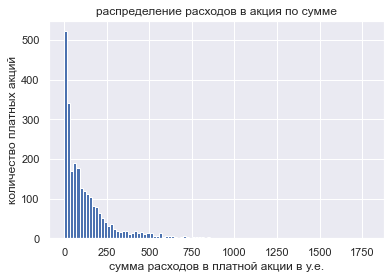

In [54]:
costs_data['costs'].hist(bins=100)
#costs_data['costs'].hist(bins=100, range = (0, 100))
plt.xlabel('сумма расходов в платной акции в у.е.')
plt.ylabel('количество платных акций')
plt.title('распределение расходов в акция по сумме');

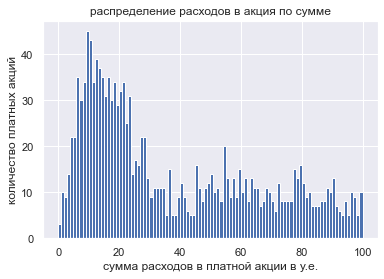

In [55]:
#costs_data['costs'].hist(bins=100)
costs_data['costs'].hist(bins=100, range = (0, 100))
plt.xlabel('сумма расходов в платной акции в у.е.')
plt.ylabel('количество платных акций')
plt.title('распределение расходов в акция по сумме');

Интересно сразу посмотреть, как распределяются источники трафика по затратам

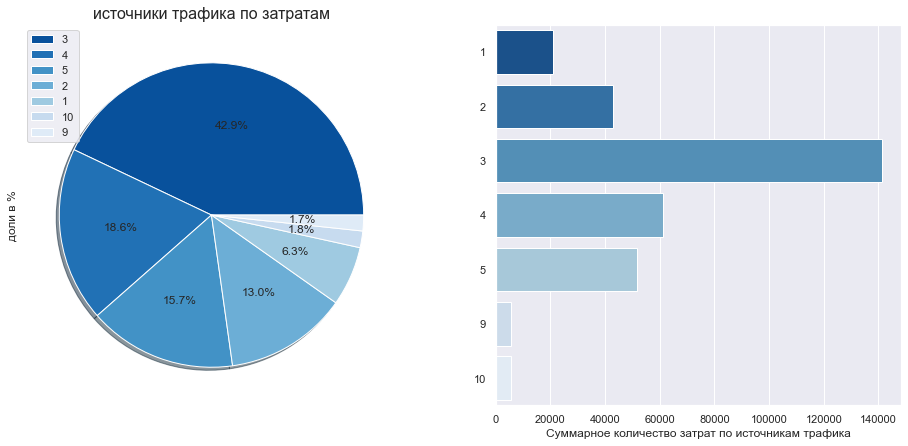

In [56]:
import seaborn as sns                 
sns.set(color_codes=True)
source_id_cost  = costs_data.pivot_table(index='source_id', values='costs', aggfunc='sum'
                                        ).sort_values('costs', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(source_id_cost.values)
    
    
cmap = sns.color_palette('Blues_r', len(source_id_cost.values))
    
source_id_cost.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=source_id_cost.index)
ax[0].set_title('источники трафика по затратам', fontsize=16)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=source_id_cost.index, x='costs', data=source_id_cost, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Суммарное количество затрат по источникам трафика')
    
plt.show() 

In [57]:
display(source_id_cost)

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


In [58]:
costs_data['costs'].sum()

329131.62

Общая сумма затрат - 329131.62 у.е. <br/>
Максимальные затраты имеет источник трафика с идентификатором 3 с суммой в 141321.63​ у.е. и долей в 42,9% в расходах.

<a name="chapter_3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3. Исследовательский анализ данных.</b> <br/>
</div>

<a name="chapter_3.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1. Продуктовые метрики.</b> <br/>
</div>

- Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;
- Определить, сколько раз за день пользователи в среднем заходят на сайт. Построить график, отражающий изменения метрики во времени;
- Исследовать, сколько времени пользователи проводят на сайте. Узнать продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построить график распределения. Изменение продолжительности сессий во времени изучать необязательно;
- Рассчитать Retention Rate, применяя когортный анализ. Показать изменения метрики во времени на графике. Найти средний Retention Rate на второй месяц «жизни» когорт.

<a name="chapter_3.1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1.1. Исследование DAU, WAU и MAU.</b> <br/>
</div>

Создадим новые столбцы  для вычисления метрик:

In [59]:
visits_log_data['session_year']  = visits_log_data['start_ts'].dt.year
visits_log_data['session_month'] = visits_log_data['start_ts'].dt.month
#visits_log_data['session_week']  = visits_log_data['start_ts'].dt.week # предупреждение на нем дается
visits_log_data['session_week']  = visits_log_data['start_ts'].dt.isocalendar().week
visits_log_data['session_date'] = visits_log_data['start_ts'].dt.date
visits_log_data.info() 
display(visits_log_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  object        
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  uint64        
 5   duration_ts    359400 non-null  int64         
 6   session_year   359400 non-null  int64         
 7   session_month  359400 non-null  int64         
 8   session_week   359400 non-null  UInt32        
 9   session_date   359400 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 26.4+ MB


,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27


Для меня оказалось неожиданностью, что тип session_date после метода .dt.date оказался объектом, и при этом он вполне вписывается во все остальные расчеты. 

И считаем средние значения DAU, WAU и MAU метрик за весь период.

In [60]:
#mau_total = users_data.groupby(['session_year','session_month']).agg({'id': 'nunique'}).mean().astype('int64')
mau_total = visits_log_data.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).mean()

dau_total = visits_log_data.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits_log_data.groupby(['session_year','session_week']).agg({'uid': 'nunique'}).mean()
print('dau_total - cреднее количество уникальных пользователей в сутки:', int(dau_total))
print('wau_total - cреднее количество уникальных пользователей в неделю:', int(wau_total))
print('mau_total - cреднее количество уникальных пользователей в год:', int(mau_total))

dau_total - cреднее количество уникальных пользователей в сутки: 907
wau_total - cреднее количество уникальных пользователей в неделю: 5716
mau_total - cреднее количество уникальных пользователей в год: 23228


Смотрим изменения DAU по всему периоду:

In [61]:
dau = visits_log_data.groupby('session_date').agg(dau_date=('uid','nunique')).reset_index()
dau['session_date'] = pd.to_datetime(dau['session_date'], format='%Y-%m-%d')
#display(dau)
#dau.info()

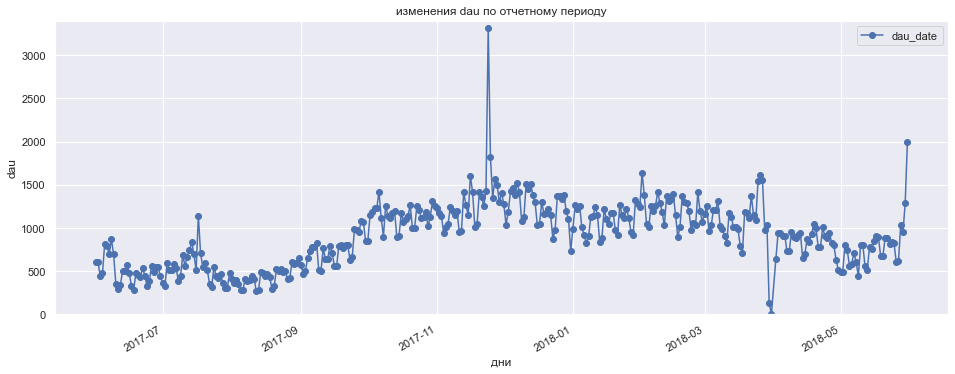

In [62]:
dau.plot(y='dau_date', x='session_date', style='o-', ylim=(0, 3400), grid=True, figsize=(16, 6))
plt.xlabel('дни')
plt.ylabel('dau')
plt.title('изменения dau по отчетному периоду')
plt.show()

In [63]:
dau.describe(include='all', datetime_is_numeric = True).T

,count,mean,min,25%,50%,75%,max,std
session_date,364,2017-11-29 15:57:21.758241792,2017-06-01 00:00:00,2017-08-30 18:00:00,2017-11-29 12:00:00,2018-02-28 06:00:00,2018-05-31 00:00:00,NaN
dau_date,364.00,907.99,1.00,594.00,921.00,1173.00,3319.00,370.51


Видим дни, когда происходили очень значимые изменения DAU, минимальное значение 1, максимальное 3319. Найдем эти даты и точку более 1100 в начале периода, и дату максимума перед спадом до 1. <br/>
Не совсем знаю, как это сделать, попробую вручную вырезая определенные сегменты.

In [64]:
dau_1 = dau[(dau['session_date'] > '2017-07-01') & (dau['session_date'] < '2017-09-01') & (dau['dau_date'] > 1000)]
display(dau_1)

,session_date,dau_date
46,2017-07-17,1138


Первая точка найдена!

In [65]:
dau_2 = dau[(dau['session_date'] > '2017-10-01') & (dau['session_date'] < '2017-11-01') & (dau['dau_date'] > 1400)]
display(dau_2)

,session_date,dau_date
127,2017-10-06,1418


In [66]:
dau_3 = dau[(dau['dau_date'] > 2000)]
display(dau_3)

,session_date,dau_date
176,2017-11-24,3319


In [67]:
dau_4 = dau[(dau['session_date'] > '2018-03-01') & (dau['session_date'] < '2018-05-01') & (dau['dau_date'] > 1500)]
display(dau_4)

,session_date,dau_date
297,2018-03-25,1545
298,2018-03-26,1609
299,2018-03-27,1551


In [68]:
dau_5 = dau[(dau['session_date'] > '2018-03-01') & (dau['session_date'] < '2018-05-01') & (dau['dau_date'] < 500)]
display(dau_5)

,session_date,dau_date
302,2018-03-30,131
303,2018-03-31,1


Забавно, но получилось! Хотя можно было и тупо посмотреть все 364 точки, но не всегда же их будет так мало... ))

In [69]:
wau_week = visits_log_data.groupby(['session_year','session_week']).agg(wau_week=('uid','nunique')).reset_index()
#display(wau_week)
#wau_week.info()


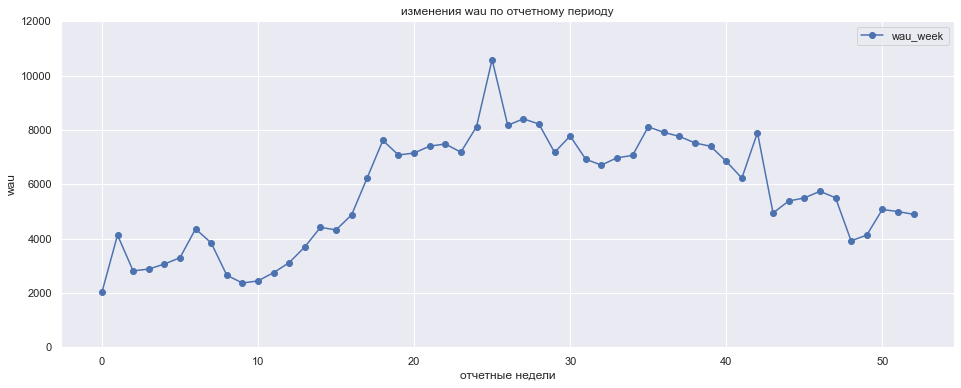

In [70]:
wau_week.plot(y='wau_week', style='o-', ylim=(0, 12000), grid=True, figsize=(16, 6))
plt.xlabel('отчетные недели')
plt.ylabel('wau')
plt.title('изменения wau по отчетному периоду')
plt.show()

In [71]:
mau_month = visits_log_data.groupby(['session_year','session_month']).agg(mau_month=('uid','nunique')).reset_index()
display(mau_month)

,session_year,session_month,mau_month
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692
5,2017,11,32797
6,2017,12,31557
7,2018,1,28716
8,2018,2,28749
9,2018,3,27473


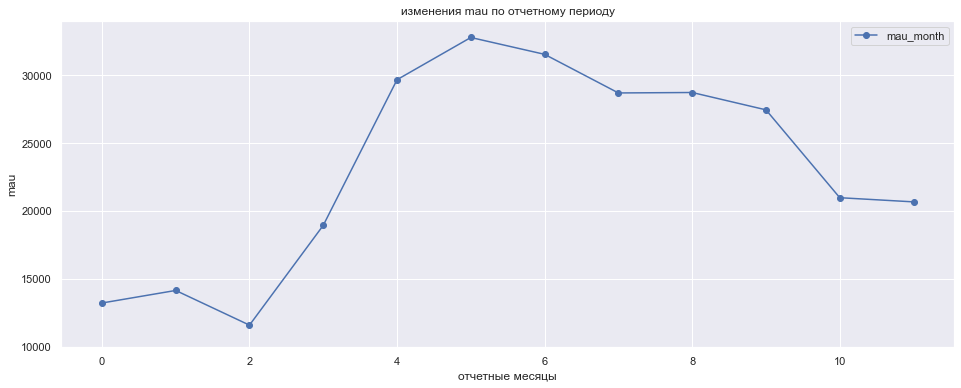

In [72]:
mau_month.plot(y='mau_month', style='o-', ylim=(10000, 34000), grid=True, figsize=(16, 6))
plt.xlabel('отчетные месяцы')
plt.ylabel('mau')
plt.title('изменения mau по отчетному периоду')
plt.show()

Думаю, что на самом деле мы наблюдаем стандартную сезонную кривую. И вполне понятно, что в летний период времени у клиентов альтернативных вариантов проведения своего свободного времени горздо больше, чем в осенне-зимний период. Думаю и билетов покупают меньше, но это посмотрим далее. 

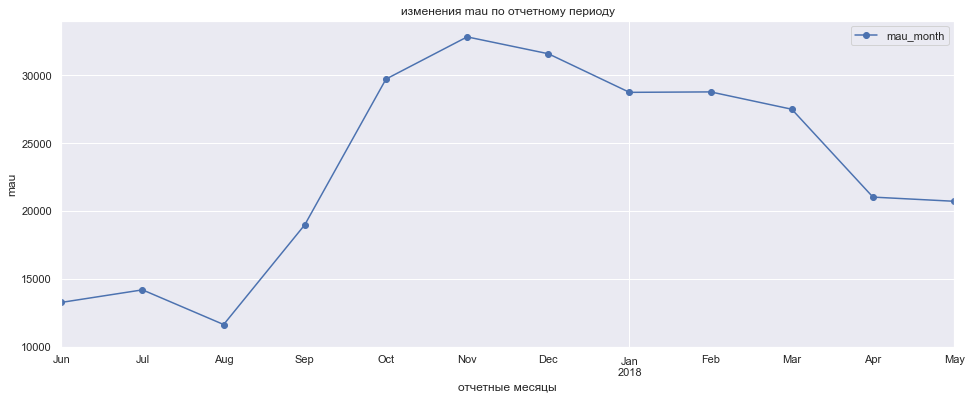

In [73]:
visits_log_data_s = visits_log_data.copy()
visits_log_data_s['session_month_0'] = visits_log_data_s['start_ts'].values.astype('datetime64[M]')
mau_month_s = visits_log_data_s.groupby(['session_year','session_month','session_month_0']).agg(mau_month=('uid','nunique')).reset_index()
#display(mau_month_s)
mau_month_s.plot(y='mau_month', x='session_month_0', style='o-', ylim=(10000, 34000), grid=True, figsize=(16, 6))
plt.xlabel('отчетные месяцы')
plt.ylabel('mau')
plt.title('изменения mau по отчетному периоду')
plt.show()


<a name="chapter_3.1.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1.2. Исследование количества сессий по отчетному периоду.</b> <br/>
</div>

Ну а сейчас смотрим, как изменяется количество сессий по дням по отчетному периоду и посчитаем, сколько раз за день пользователи в среднем заходят на сайт

In [74]:
mean_session = visits_log_data.groupby('session_date').agg(dau_date=('uid','nunique'), session_m=('uid','count')).reset_index()
mean_session['session_date'] = pd.to_datetime(mean_session['session_date'], format='%Y-%m-%d')
mean_session['session_1_uid_av'] = mean_session['session_m'] / mean_session['dau_date']
#display(mean_session['session_1_uid_av'].mean())
print('cреднее количество заходов на сайт в сутки:', mean_session['session_1_uid_av'].mean()) 

cреднее количество заходов на сайт в сутки: 1.0821696440039723


Не так много, очень малое количество клиентов заходят более одного раза в сутки.

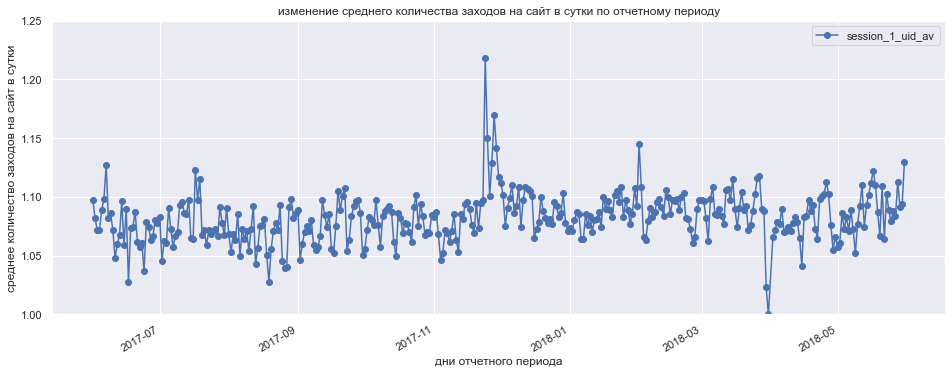

In [75]:
mean_session.plot(y='session_1_uid_av', x='session_date', style='o-', ylim=(1, 1.25), grid=True, figsize=(16, 6))
plt.xlabel('дни отчетного периода')
plt.ylabel('cреднее количество заходов на сайт в сутки')
plt.title('изменение cреднего количества заходов на сайт в сутки по отчетному периоду')
plt.show()

Наблюдается тренд на повышение данного показателя на протяжении отчетного периода, что уже радует ))

<a name="chapter_3.1.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1.3. Исследование времени, которое пользователи проводят на сайте.</b> <br/>
</div>

Посмотрим, сколько времени пользователи проводят на сайте. Мы уже строили эту диаграмму ранее, повторим.

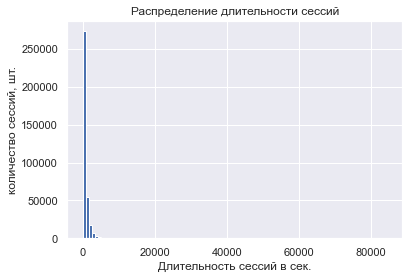

In [76]:
visits_log_data['duration_ts'] = (visits_log_data['end_ts'] - visits_log_data['start_ts']).dt.seconds #посчитайте продолжительность сессий
visits_log_data['duration_ts'].hist(bins=100)
plt.xlabel('Длительность сессий в сек.')
plt.ylabel('количество сессий, шт.')
plt.title('Распределение длительности сессий');

In [77]:
duration_visits_mean = visits_log_data['duration_ts'].sum() / len(visits_log_data['uid'])
print('cредняя продолжительность времени на сайте:', duration_visits_mean) 

cредняя продолжительность времени на сайте: 643.506488592098


In [78]:
display(visits_log_data['duration_ts'].mode())

0    60
Name: duration_ts, dtype: int64

Мода равна 60с. Большинство клиентов укладывается в 60с.

In [79]:
visits_log_data['duration_ts'].describe()

count   359400.00
mean       643.51
std       1016.33
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      84480.00
Name: duration_ts, dtype: float64

И посмотрим, как это различается для разных девайсов

In [80]:
visits_log_data['duration_ts'].loc[visits_log_data['device'] == 'touch'].describe()


count   96833.00
mean      479.62
std       752.53
min         0.00
25%        60.00
50%       180.00
75%       600.00
max     30840.00
Name: duration_ts, dtype: float64

In [81]:
display(visits_log_data['duration_ts'].loc[visits_log_data['device'] == 'touch'].mode())

0    60
Name: duration_ts, dtype: int64

In [82]:
visits_log_data['duration_ts'].loc[visits_log_data['device'] == 'desktop'].describe()

count   262567.00
mean       703.95
std       1091.55
min          0.00
25%        120.00
50%        360.00
75%        900.00
max      84480.00
Name: duration_ts, dtype: float64

Средняя длительность сессий на девайсе desktop равна 703,95с, а на девайсе touch 479,62, различается в 1,47 раза.

In [83]:
display(visits_log_data['duration_ts'].loc[visits_log_data['device'] == 'desktop'].mode())

0    60
Name: duration_ts, dtype: int64

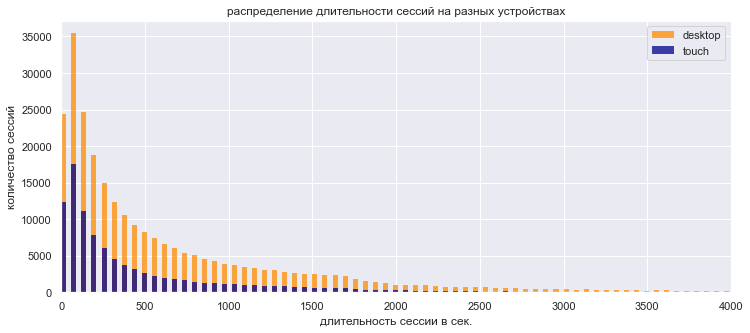

In [84]:
fig = plt.subplots(figsize=(12, 5))

sns.histplot(visits_log_data['duration_ts'].loc[visits_log_data['device'] == 'desktop'], color='darkorange', binwidth=30)
sns.histplot(visits_log_data['duration_ts'].loc[visits_log_data['device'] == 'touch'], color='darkblue', binwidth=30)


plt.legend(loc='upper right', labels=['desktop', 'touch'])
plt.title('распределение длительности сессий на разных устройствах')
plt.xlabel('длительность сессии в сек.')
plt.ylabel('количество сессий')
plt.xlim([0, 4000]);


Хотя моды на девайсах и не различаются, но довольно хорошо видно, что длительность сессии у десктопных устройств выше, если она вышла за пределы 1 минуты.

<a name="chapter_3.1.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1.4. Retention Rate и когортный анализ.</b> <br/>
</div>


Когортный анализ будем делать на основе первого месяца появления клиента на сервисе. Для этого в таблице должен появиться соответствующий столбец.

Вначале сделаем столбец начала первой сессии, от которого будем считать время жизни клиента. Потом сделаем отдельный столбец когорты.

In [85]:
visits_log_data.info()
first_session_date = visits_log_data.groupby('uid').agg(first_session_date=('start_ts','min')).reset_index()
# интересно, что "first" на типе object отрабатывает, не показывая ошибок, но не дает правильного результата при просмотре объединенного массива данных
#https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5%20%D0%B8%20%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.html
display(first_session_date.head(5))
#first_session_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  object        
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  uint64        
 5   duration_ts    359400 non-null  int64         
 6   session_year   359400 non-null  int64         
 7   session_month  359400 non-null  int64         
 8   session_week   359400 non-null  UInt32        
 9   session_date   359400 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 26.4+ MB


,uid,first_session_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Уникальных uid у нас 228169 из общего количества в 359400 записей. <br/>
Далее объединим таблицы visits_log_data и first_session_date, сделаем это методом .merge

In [86]:
visits_log_data_2 = visits_log_data.merge(first_session_date, on=['uid'], how = 'left')
#visits_log_data_2.info()
display(visits_log_data_2.head(5))

,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00


И специальный столбец для обозначения месяца сессии и месяца когорты.

In [87]:
visits_log_data_2['session_date_month'] = visits_log_data_2['start_ts'].values.astype('datetime64[M]')
visits_log_data_2['cohort_month'] = visits_log_data_2['first_session_date'].values.astype('datetime64[M]')
visits_log_data_2['cohort_month'] = visits_log_data_2['first_session_date'].values.astype('datetime64[M]')
visits_log_data_2.info()
display(visits_log_data_2.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   device              359400 non-null  object        
 1   end_ts              359400 non-null  datetime64[ns]
 2   source_id           359400 non-null  int64         
 3   start_ts            359400 non-null  datetime64[ns]
 4   uid                 359400 non-null  uint64        
 5   duration_ts         359400 non-null  int64         
 6   session_year        359400 non-null  int64         
 7   session_month       359400 non-null  int64         
 8   session_week        359400 non-null  UInt32        
 9   session_date        359400 non-null  object        
 10  first_session_date  359400 non-null  datetime64[ns]
 11  session_date_month  359400 non-null  datetime64[ns]
 12  cohort_month        359400 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](

,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date,first_session_date,session_date_month,cohort_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01


Делаем столбец lifetime и переводим его в месяцы и далее округлим методом round(), а затем приведём их к целочисленному типу методом astype('int'):

In [88]:
visits_log_data_2['cohort_lifetime'] = visits_log_data_2['session_date_month'] - visits_log_data_2['cohort_month']
visits_log_data_2['cohort_lifetime'] = visits_log_data_2['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_log_data_2['cohort_lifetime'] = visits_log_data_2['cohort_lifetime'].round().astype('int') 
visits_log_data_2.info()
display(visits_log_data_2.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   device              359400 non-null  object        
 1   end_ts              359400 non-null  datetime64[ns]
 2   source_id           359400 non-null  int64         
 3   start_ts            359400 non-null  datetime64[ns]
 4   uid                 359400 non-null  uint64        
 5   duration_ts         359400 non-null  int64         
 6   session_year        359400 non-null  int64         
 7   session_month       359400 non-null  int64         
 8   session_week        359400 non-null  UInt32        
 9   session_date        359400 non-null  object        
 10  first_session_date  359400 non-null  datetime64[ns]
 11  session_date_month  359400 non-null  datetime64[ns]
 12  cohort_month        359400 non-null  datetime64[ns]
 13  cohort_lifetime     359400 no

,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date,first_session_date,session_date_month,cohort_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [89]:
cohorts_visits_log_data = visits_log_data_2.groupby(
    ['cohort_month','cohort_lifetime']).agg(cohort_user_count=('uid','nunique')).reset_index()

#cohorts_visits_log_data_2.sort_values(by='cohort_month', ascending=False)
display(cohorts_visits_log_data.head(5))                                                                                             

,cohort_month,cohort_lifetime,cohort_user_count
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


И далее нам надо добавить столбец с количеством count_uid для первого месяца возникновения когорты.

In [90]:
initial_users_count = cohorts_visits_log_data[cohorts_visits_log_data['cohort_lifetime'] == 0][
    ['cohort_month', 'cohort_user_count']]
display(initial_users_count)

,cohort_month,cohort_user_count
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Учитывая, что это новые клиенты, то похоже опять же на сезонную кривую, ближе к лету не до театров, есть чем у народа заняться в это время ))

И соединим таблицы методом .merge

In [91]:
columns_new = ['cohort_month', 'cohort_user_count_0']
initial_users_count.set_axis(columns_new, axis='columns', inplace=True)
display(initial_users_count)

,cohort_month,cohort_user_count_0
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [92]:
cohorts_visits_log_data = cohorts_visits_log_data.merge(initial_users_count, on=['cohort_month'], how = 'left')
display(cohorts_visits_log_data.head(5))

,cohort_month,cohort_lifetime,cohort_user_count,cohort_user_count_0
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


И считаем Retention Rate -  сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

In [93]:
cohorts_visits_log_data['retention'] = cohorts_visits_log_data[
    'cohort_user_count'] / cohorts_visits_log_data['cohort_user_count_0'] 
display(cohorts_visits_log_data.head(5))

,cohort_month,cohort_lifetime,cohort_user_count,cohort_user_count_0,retention
0,2017-06-01,0,13259,13259,1.00
1,2017-06-01,1,1043,13259,0.08
2,2017-06-01,2,713,13259,0.05
3,2017-06-01,3,814,13259,0.06
4,2017-06-01,4,909,13259,0.07


Cтроим сводную таблицу и создаем тепловую карту:

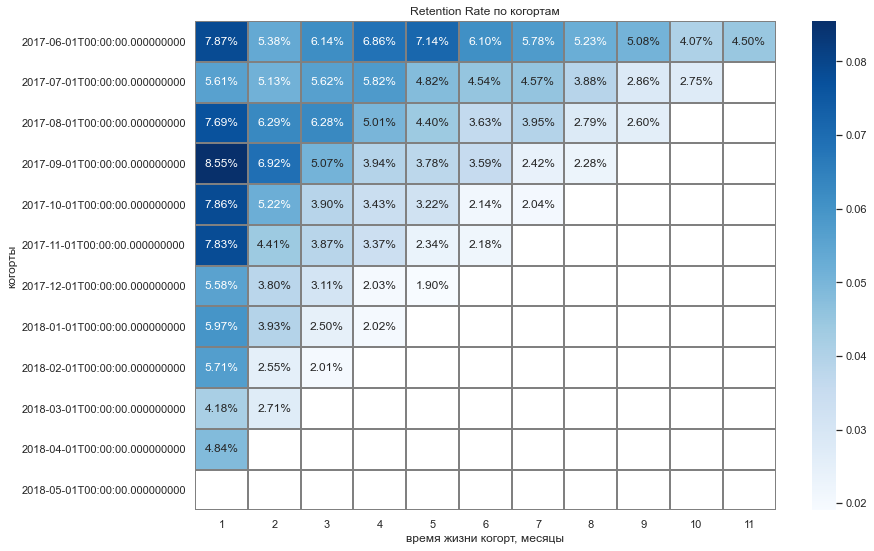

In [94]:
retention_pivot = cohorts_visits_log_data.pivot_table(
    index='cohort_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 
#display(retention_pivot.head(5))
#retention_pivot.info()
# .loc[:,1:11] - уберем нулевой месяц
#plt.ylabel('время жизни когорт, месяцы')
#plt.xlabel('когорты')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate по когортам')
sns.heatmap(retention_pivot.loc[:,1:11], annot=True, fmt='.2%', linewidths=1, linecolor='gray', cmap= 'Blues')
plt.xlabel('время жизни когорт, месяцы')
plt.ylabel('когорты'); 
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#https://pythonru.com/biblioteki/seaborn-plot
# а как изменить отображение даты когорты на без часов?

Показатель удержания падает для каждой когорты. Но это тоже похоже на сезонные причины, это же уже май.<br/>
Резко выделяется первая когорта. Пока причина непонятна, могут быть акции, особенно для оптовиков. У когорты 09.2017 самый лучший старт, 8,55% - можно ассоциировать с началом учебного года.<br/>
И месяц ноябрь - тоже успешен, видимо по причине покупки билетов к Новому году.<br/>
В июне 2017 была такая акция - «Лето с Яндекс.Афишей: скидки на билеты на летние концерты до 40%», может это быть причиной? Старт продаж по акции был  был 21 июня 2017, посмотрим позже по продаже билетов...<br/>
https://kudago.com/msk/event/aktsiya-leto-s-yandeksafishej-2017/<br/>
https://ru.wikipedia.org/wiki/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81.%D0%90%D1%84%D0%B8%D1%88%D0%B0<br/>

<a name="chapter_3.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2. Метрики электронной коммерции.</b> <br/>
</div>

Из задания:<br/>
2.2. Метрики электронной коммерции<br/>
2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;<br/>
2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;<br/>
2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;<br/>
2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;<br/>

<a name="chapter_3.2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2.1. Исследование метрики среднего времени с момента первого посещения сайта до совершения покупки<b> <br/>
</div>

Делаем столбец с датой первой покупки клиента:

In [95]:
#orders_log_data.info()
first_order_date = orders_log_data.groupby('uid').agg(first_order_date=('buy_ts','min')).reset_index()
#display(first_order_date.head(5))
#first_order_date.info()

Соединяем таблицы по uid

In [96]:
orders_log_data_2 = orders_log_data.merge(first_order_date, on=['uid'], how = 'left')
#orders_log_data_2.info()
display(orders_log_data_2.head(5))

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


А сейчас мы можем соединить две таблицы visits_log_data_2 и orders_log_data_2, соединяем по uid

In [97]:
visits_orders_data = visits_log_data_2.merge(orders_log_data_2, on=['uid'], how = 'left')
display(visits_orders_data.head(5))

,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date,first_session_date,session_date_month,cohort_month,cohort_lifetime,buy_ts,revenue,first_order_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0,NaT,NaN,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0,NaT,NaN,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,NaT,NaN,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-05-01,2018-03-01,2,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01,0,NaT,NaN,NaT


In [98]:
missing_values = visits_orders_data.isnull().sum()
display(missing_values)

device                     0
end_ts                     0
source_id                  0
start_ts                   0
uid                        0
duration_ts                0
session_year               0
session_month              0
session_week               0
session_date               0
first_session_date         0
session_date_month         0
cohort_month               0
cohort_lifetime            0
buy_ts                262006
revenue               262006
first_order_date      262006
dtype: int64

Интересно посчитать, какой процент уникальных пользователей хотя бы один раз сделал покупку.

In [99]:
orders_uid = len(visits_orders_data['uid'].loc[visits_orders_data['revenue'] > 0].unique()) / len(visits_orders_data['uid'].unique()) * 100
display(orders_uid)

16.000859012398706

Всего 16% хотя бы один раз сделали покупку. Не так и мало, кстати. Вполне приличный показатель.

Сделаем столбец с количеством дней первой сессии на сервисе до покупки. Посмотрев результат, решил сделать в минутах.

In [100]:
#visits_orders_data['day_to_order'] = (visits_orders_data['first_order_date'] - visits_orders_data['first_session_date']).dt.days
visits_orders_data['min_to_order'] = (visits_orders_data['first_order_date'] - visits_orders_data['first_session_date']).dt.seconds / 60
#display(visits_orders_data.head(5))
#visits_orders_data.info()

Пометим отсутствующие данные в столбце day_to_order значением -1

In [101]:
visits_orders_data['min_to_order'] = visits_orders_data['min_to_order'].fillna(-1)
#display(visits_orders_data.head(5))

In [102]:
min_to_order = visits_orders_data.loc[visits_orders_data['min_to_order'] >= 0]
min_to_order = min_to_order.groupby('uid').agg(min_to_order=('min_to_order','min')).reset_index()
display(min_to_order.head(5))
#day_to_order.info()

,uid,min_to_order
0,313578113262317,1382.00
1,1575281904278712,0.00
2,2429014661409475,79.00
3,2464366381792757,1184.00
4,2551852515556206,0.00


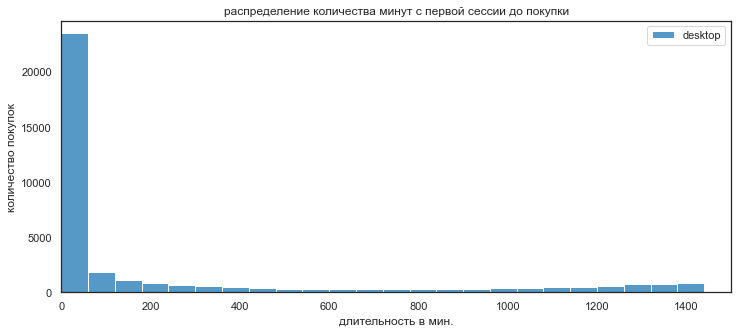

In [103]:
fig = plt.subplots(figsize=(12, 5))

sns.histplot(min_to_order['min_to_order'], color='#1f77b4', binwidth=60)



plt.legend(loc='upper right', labels=['desktop', 'touch'])
plt.title('распределение количества минут с первой сессии до покупки')
plt.xlabel('длительность в мин.')
plt.ylabel('количество покупок')
plt.xlim([0, 1500]);
#https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors
#{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} (case-insensitive);
#'color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'    

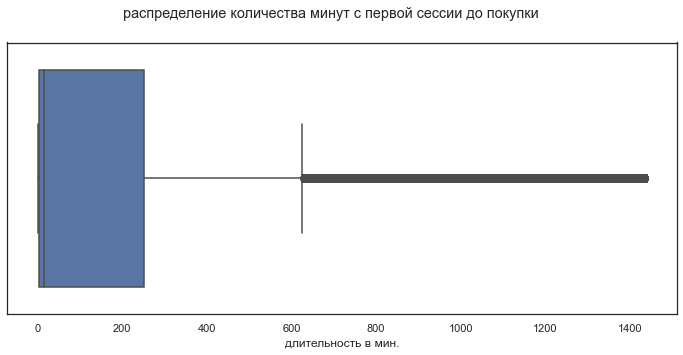

In [104]:
fig, axes = plt.subplots(1, figsize=(12, 5))

# Чтобы поменять ориентацию боксплота нужно поменять местами колонки в x/y
sns.boxplot(data=min_to_order, x='min_to_order', ax=axes)

# Добавим подписи для каждой колонки 

axes.set_xlabel('длительность в мин.')
fig.suptitle('распределение количества минут с первой сессии до покупки');

Несколько с другой стороны, а далее и в цифрах.

In [105]:
min_to_order['min_to_order'].describe()

count   36523.00
mean      249.16
std       429.74
min         0.00
25%         4.00
50%        16.00
75%       252.00
max      1439.00
Name: min_to_order, dtype: float64

In [106]:
min_to_order['min_to_order'].mode()

0   1.00
Name: min_to_order, dtype: float64

Большинство покупает в первую минуту, по медиане за 16 минут, а в среднем - 249 минут. И есть уникумы, что берут через 24 часа. Давайте их посмотрим внимательнее:

In [107]:
long_min_to_order = min_to_order.loc[min_to_order['min_to_order'] >= 1400]
display(len(long_min_to_order))

567

И таких у нас 567 человек.

In [108]:
long_visits_orders = visits_orders_data.loc[visits_orders_data['min_to_order'] >= 1400]
display(long_visits_orders.sample(10, random_state=1))

,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date,first_session_date,session_date_month,cohort_month,cohort_lifetime,buy_ts,revenue,first_order_date,min_to_order
766710,desktop,2017-09-14 11:39:00,2,2017-09-14 09:58:00,11920452646463905188,6060,2017,9,37,2017-09-14,2017-06-01 11:38:00,2017-09-01,2017-06-01,3,2017-12-14 20:23:00,4.89,2017-06-03 11:27:00,1429.00
578174,desktop,2017-12-24 13:16:00,2,2017-12-24 13:08:00,11920452646463905188,480,2017,12,51,2017-12-24,2017-06-01 11:38:00,2017-12-01,2017-06-01,6,2018-03-21 13:49:00,0.92,2017-06-03 11:27:00,1429.00
41552,desktop,2017-11-16 13:51:00,1,2017-11-16 12:37:00,10534330097262531592,4440,2017,11,46,2017-11-16,2017-06-01 22:55:00,2017-11-01,2017-06-01,5,2018-02-22 11:21:00,9.78,2017-07-14 22:52:00,1437.00
181304,desktop,2018-04-23 18:20:00,2,2018-04-23 18:15:00,11920452646463905188,300,2018,4,17,2018-04-23,2017-06-01 11:38:00,2018-04-01,2017-06-01,10,2017-09-18 18:10:00,11.00,2017-06-03 11:27:00,1429.00
320039,desktop,2017-10-13 11:57:00,1,2017-10-13 11:55:00,11920452646463905188,120,2017,10,41,2017-10-13,2017-06-01 11:38:00,2017-10-01,2017-06-01,4,2018-02-16 10:58:00,0.92,2017-06-03 11:27:00,1429.00
19584,desktop,2017-10-22 17:19:00,5,2017-10-22 17:07:00,11920452646463905188,720,2017,10,42,2017-10-22,2017-06-01 11:38:00,2017-10-01,2017-06-01,4,2017-06-06 11:53:00,7.33,2017-06-03 11:27:00,1429.00
942713,desktop,2018-03-27 15:57:00,2,2018-03-27 15:48:00,13405147649137020210,540,2018,3,13,2018-03-27,2017-06-05 15:11:00,2018-03-01,2017-06-01,9,2018-02-20 14:55:00,0.49,2018-02-20 14:55:00,1424.00
153220,desktop,2018-01-02 16:07:00,2,2018-01-02 16:03:00,11920452646463905188,240,2018,1,1,2018-01-02,2017-06-01 11:38:00,2018-01-01,2017-06-01,7,2018-02-27 10:13:00,8.55,2017-06-03 11:27:00,1429.00
158660,desktop,2018-02-01 19:38:00,5,2018-02-01 19:14:00,5894138436147686046,1440,2018,2,5,2018-02-01,2017-06-09 13:23:00,2018-02-01,2017-06-01,8,2017-10-16 14:05:00,3.05,2017-09-22 13:19:00,1436.00
521025,desktop,2018-02-16 11:08:00,5,2018-02-16 10:58:00,11920452646463905188,600,2018,2,7,2018-02-16,2017-06-01 11:38:00,2018-02-01,2017-06-01,8,2017-12-06 11:00:00,2.81,2017-06-03 11:27:00,1429.00


Разное время, разные суммы покупок у таких - похожи на естественных покупателей. Может, на сутки можно бронировать билеты? Посмотрим на сервисе. <br/>
Оплату необходимо завершить в течение 15 минут, так сказано в справке у Яндекс.Афиши, <br/>
https://yandex.ru/support/afisha/theatre-ticket.html#q1

И вспомним про странные заходы длительностью в 19с, что выплывали выше?

In [109]:
visits_orders_19 = visits_orders_data.loc[visits_orders_data['duration_ts'] == 19]
#display(visits_orders_19.sample(10, random_state=1))
display(len(visits_orders_19))
display(visits_orders_19.sample(10, random_state=1))

1964

,device,end_ts,source_id,start_ts,uid,duration_ts,session_year,session_month,session_week,session_date,first_session_date,session_date_month,cohort_month,cohort_lifetime,buy_ts,revenue,first_order_date,min_to_order
1021969,desktop,2017-06-15 14:00:19,4,2017-06-15 14:00:00,1456458155356572513,19,2017,6,24,2017-06-15,2017-06-15 14:00:00,2017-06-01,2017-06-01,0,2017-06-15 15:59:00,0.37,2017-06-15 14:00:00,0.00
1022472,desktop,2018-01-18 09:27:19,3,2018-01-18 09:27:00,4466141355899162239,19,2018,1,3,2018-01-18,2018-01-18 09:27:00,2018-01-01,2018-01-01,0,2018-01-18 09:27:00,1.77,2018-01-18 09:27:00,0.00
1023607,touch,2017-10-28 14:49:19,2,2017-10-28 14:49:00,16036340039024934906,19,2017,10,43,2017-10-28,2017-10-28 14:49:00,2017-10-01,2017-10-01,0,2017-10-28 14:49:00,7.94,2017-10-28 14:49:00,0.00
1023483,desktop,2017-06-06 14:42:19,4,2017-06-06 14:42:00,15036383982305854706,19,2017,6,23,2017-06-06,2017-06-06 14:42:00,2017-06-01,2017-06-01,0,2017-06-06 14:42:00,0.61,2017-06-06 14:42:00,0.00
1023768,touch,2018-02-27 00:32:19,1,2018-02-27 00:32:00,17922803755368507646,19,2018,2,9,2018-02-27,2018-02-27 00:32:00,2018-02-01,2018-02-01,0,2018-02-27 12:09:00,0.92,2018-02-27 00:32:00,0.00
1023159,desktop,2017-12-21 12:55:19,3,2017-12-21 12:55:00,11107265500220511271,19,2017,12,51,2017-12-21,2017-12-21 12:55:00,2017-12-01,2017-12-01,0,2017-12-21 21:53:00,5.55,2017-12-21 12:55:00,0.00
1022557,desktop,2017-09-15 10:40:19,3,2017-09-15 10:40:00,5198884880936666245,19,2017,9,37,2017-09-15,2017-09-15 10:40:00,2017-09-01,2017-09-01,0,2017-09-15 10:40:00,4.89,2017-09-15 10:40:00,0.00
1023184,desktop,2018-02-03 09:50:19,1,2018-02-03 09:50:00,11539195780381855905,19,2018,2,5,2018-02-03,2018-02-03 09:50:00,2018-02-01,2018-02-01,0,2018-02-03 09:50:00,1.22,2018-02-03 09:50:00,0.00
1023295,desktop,2018-05-14 00:20:19,1,2018-05-14 00:20:00,12717078328781893393,19,2018,5,20,2018-05-14,2018-05-14 00:20:00,2018-05-01,2018-05-01,0,2018-05-14 00:20:00,2.20,2018-05-14 00:20:00,0.00
1023359,desktop,2017-10-30 16:19:19,5,2017-10-30 16:19:00,13517251505136503784,19,2017,10,44,2017-10-30,2017-10-30 16:19:00,2017-10-01,2017-10-01,0,2017-10-30 16:30:00,18.33,2017-10-30 16:19:00,0.00


А они все с покупками оказались? Интересно, в чем причина таких быстрых покупок? Будем думать...

И этого не вижу в задании, но давайте посмотрим, сколько заходов и какой общей длительности с разных девайсов. Хотелось бы покупки посчитать, но нет у нас полных данных для этого.

In [110]:
#device_time = visits_orders_data.loc[visits_orders_data['revenue'] > 0]
device_time = visits_log_data.groupby('device').agg(count_duration=('duration_ts','count'), sum_duration=('duration_ts','sum'))

display(device_time)

,count_duration,sum_duration
device,,
desktop,262567,184833246
touch,96833,46442986


In [111]:
device_time_count = visits_log_data.groupby('device').agg(count_duration=('duration_ts','count'))


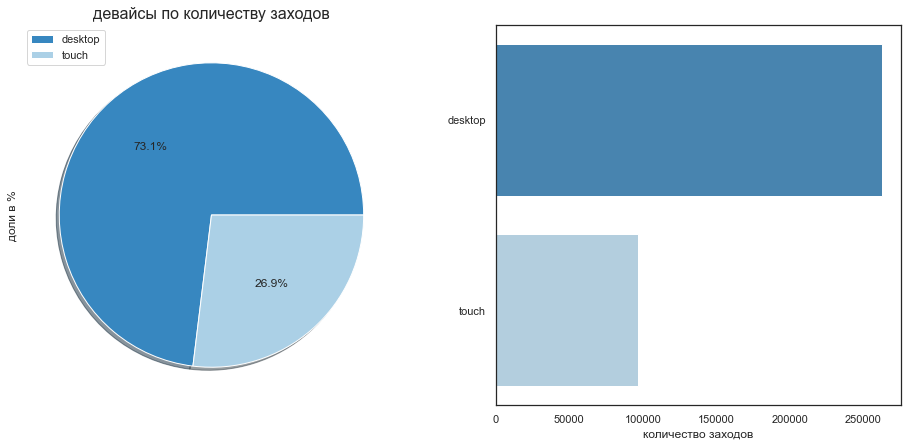

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(device_time_count.values)
    
    
cmap = sns.color_palette('Blues_r', len(device_time_count.values))
    
device_time_count.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=device_time_count.index)
ax[0].set_title('девайсы по количеству заходов', fontsize=16)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=device_time_count.index, x='count_duration', data=device_time_count, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('количество заходов')
    
plt.show() 



In [113]:
device_time_sum = visits_log_data.groupby('device').agg(sum_duration=('duration_ts','sum'))

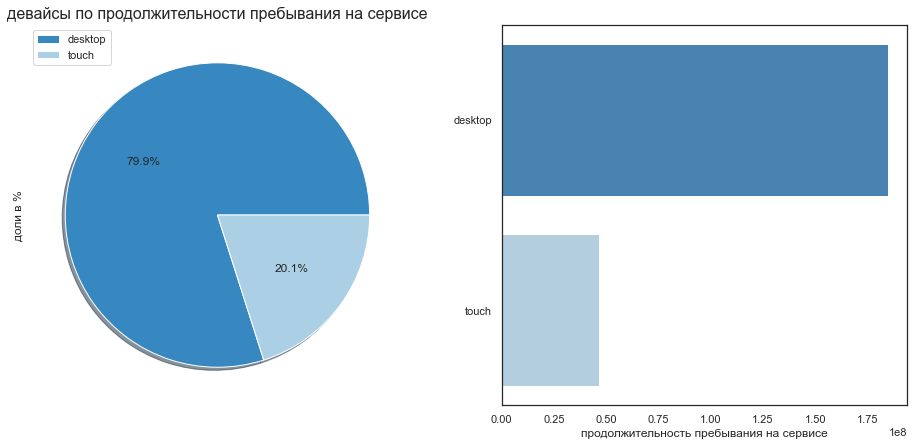

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(device_time_sum.values)
    
    
cmap = sns.color_palette('Blues_r', len(device_time_sum.values))
    
device_time_sum.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=device_time_sum.index)
ax[0].set_title('девайсы по продолжительности пребывания на сервисе', fontsize=16)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=device_time_sum.index, x='sum_duration', data=device_time_sum, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('продолжительность пребывания на сервисе')
    
plt.show() 

Явный перевес на стороне десктопных устройств, доли по количеству заходов 73,1 и 26,9%. И еще больший по общей продолжительности пребывания, доли 79,9 и 20,1%. Несколько неожиданно, но мы рассматриваем  еще 2017-2018г.г.

<a name="chapter_3.2.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2.2. Cреднее количество покупок на одного покупателя за определённый период..</b> <br/>
</div>

Посчитаем, как часто у нас в среднем покупали уже купившие один раз. Не считаем нулевые revenue. Найдем для начала самых активных покупателей.

In [115]:
purchase_all = orders_log_data.copy()
purchase_all = purchase_all.loc[purchase_all['revenue'] > 0]
purchase_all = purchase_all.groupby(
    ['uid']).agg(purchase_count=('revenue','count'), purchase_sum=('revenue','sum')).reset_index()
purchase_all = purchase_all.sort_values(by='purchase_sum', ascending=False)
display(purchase_all.head(5))

,uid,purchase_count,purchase_sum
11007,5539673724080479777,101,11810.18
22062,11149926373378902217,16,10519.46
35656,17999372575896145244,37,1979.33
13450,6731421022966725351,183,1450.68
7200,3644482766749211722,239,1444.29


У нас есть хорошие оптовые покупатели, есть и которые купили на сумму более 10 тыс. у.е. И таких целых двое!

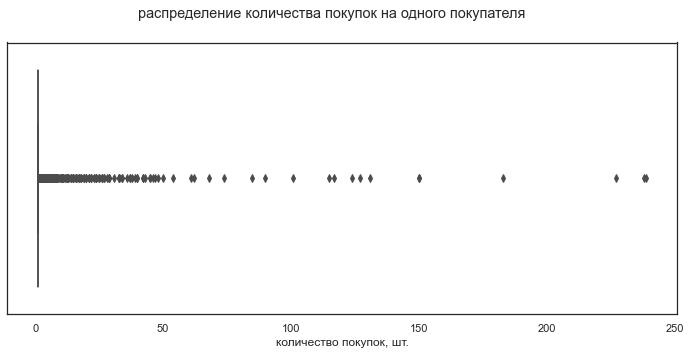

In [116]:
fig, axes = plt.subplots(1, figsize=(12, 5))
# Чтобы поменять ориентацию боксплота нужно поменять местами колонки в x/y
sns.boxplot(data=purchase_all, x='purchase_count', ax=axes)
# Добавим подписи для каждой колонки 
axes.set_xlabel('количество покупок, шт.')
fig.suptitle('распределение количества покупок на одного покупателя');

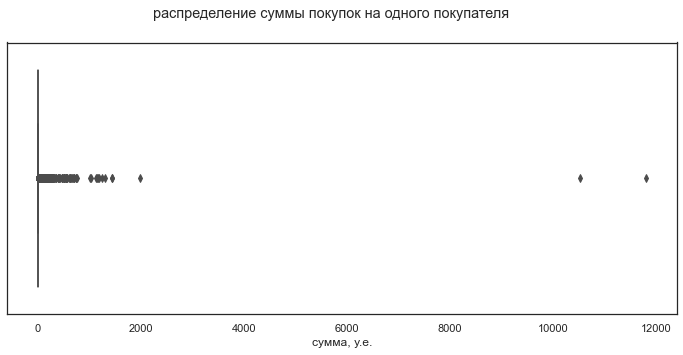

In [117]:
fig, axes = plt.subplots(1, figsize=(12, 5))
sns.boxplot(data=purchase_all, x='purchase_sum', ax=axes)
axes.set_xlabel('сумма, у.е.')
fig.suptitle('распределение суммы покупок на одного покупателя');

In [118]:
purchase_all.describe(include='all')

,uid,purchase_count,purchase_sum
count,36509.00,36509.00,36509.00
mean,9214109124090489856.00,1.38,6.90
std,5324616545165850624.00,3.45,88.15
min,313578113262317.00,1.00,0.03
25%,4615520000248032256.00,1.00,1.47
50%,9247514176794470400.00,1.00,3.05
75%,13837149343143256064.00,1.00,5.80
max,18446167067214817280.00,239.00,11810.18


In [119]:
average_check = purchase_all['purchase_sum'].sum() / purchase_all['purchase_count'].sum()
print('Средний чек по отчетному периоду: ', average_check)

Средний чек по отчетному периоду:  5.004709713287269


Воспользуемся уже готовым orders_log_data_2. И сделаем новые столбцы для последующего когортного анализа. Когорты сделаем по месяцу первой покупки.

In [120]:
orders_log_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy_ts            50415 non-null  datetime64[ns]
 1   revenue           50415 non-null  float64       
 2   uid               50415 non-null  uint64        
 3   first_order_date  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.9 MB


In [121]:
purchase_orders_data = orders_log_data_2.copy() # не будем пока трогать старую таблицу
#purchase_orders_data = purchase_orders_data.loc[purchase_orders_data['revenue'] != 0] # уберем нулевые покупки


purchase_orders_data['cohort_order_month'] = purchase_orders_data['first_order_date'].values.astype('datetime64[M]')
purchase_orders_data['order_month'] = purchase_orders_data['buy_ts'].values.astype('datetime64[M]')
purchase_orders_data.info()
display(purchase_orders_data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              50415 non-null  datetime64[ns]
 1   revenue             50415 non-null  float64       
 2   uid                 50415 non-null  uint64        
 3   first_order_date    50415 non-null  datetime64[ns]
 4   cohort_order_month  50415 non-null  datetime64[ns]
 5   order_month         50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.7 MB


,buy_ts,revenue,uid,first_order_date,cohort_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [122]:
purchase_orders_data['cohort_time'] = purchase_orders_data['order_month'] - purchase_orders_data['cohort_order_month']
purchase_orders_data['cohort_time'] = purchase_orders_data['cohort_time'] / np.timedelta64(1, 'M')
purchase_orders_data['cohort_time'] = purchase_orders_data['cohort_time'].round().astype('int') 
purchase_orders_data.info()
display(purchase_orders_data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              50415 non-null  datetime64[ns]
 1   revenue             50415 non-null  float64       
 2   uid                 50415 non-null  uint64        
 3   first_order_date    50415 non-null  datetime64[ns]
 4   cohort_order_month  50415 non-null  datetime64[ns]
 5   order_month         50415 non-null  datetime64[ns]
 6   cohort_time         50415 non-null  int32         
dtypes: datetime64[ns](4), float64(1), int32(1), uint64(1)
memory usage: 2.9 MB


,buy_ts,revenue,uid,first_order_date,cohort_order_month,order_month,cohort_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


Считаем количество уникальных покупателей по когортам. И покупки с нулевым revenue убираем. Давайте и уберем нашу единственную покупку 2018-06-01 -	для красоты и для того, чтобы правильнее посчитать среднее количество покупок в конце по месяцу. <br/>
Учитывая, что нам еще LTV считать, то сразу посчитаем и сумму.

In [123]:
cohorts_purchase_orders_data = purchase_orders_data.loc[purchase_orders_data['revenue'] > 0]
cohorts_purchase_orders_data = purchase_orders_data.loc[purchase_orders_data['buy_ts'] < '2018-06-01']
cohorts_purchase_orders_data = cohorts_purchase_orders_data.groupby(
    ['cohort_order_month','cohort_time']).agg(cohort_order_user_count=(
    'uid','nunique'), cohort_order_count=('revenue','count'), cohort_order_sum=('revenue','sum')).reset_index()
display(cohorts_purchase_orders_data.head(5))     

,cohort_order_month,cohort_time,cohort_order_user_count,cohort_order_count,cohort_order_sum
0,2017-06-01,0,2023,2354,9557.49
1,2017-06-01,1,61,177,981.82
2,2017-06-01,2,50,174,885.34
3,2017-06-01,3,54,226,1931.30
4,2017-06-01,4,88,292,2068.58


И далее нам надо добавить столбец с количеством count_uid cohort_order_user_count для первого месяца возникновения когорты.

In [124]:
initial_users_count = cohorts_purchase_orders_data[cohorts_purchase_orders_data['cohort_time'] == 0][
    ['cohort_order_month', 'cohort_order_user_count']]
display(initial_users_count)

,cohort_order_month,cohort_order_user_count
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


Последний месяц (убрали его немного выше), мы знаем его причину - всего одна покупка, можно его и не рассматривать для красоты графиков.

Соединим таблицы.

In [125]:
columns_new = ['cohort_order_month', 'cohort_order_user_count_0']
initial_users_count.set_axis(columns_new, axis='columns', inplace=True)
display(initial_users_count)

,cohort_order_month,cohort_order_user_count_0
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [126]:
cohorts_purchase_orders_data = cohorts_purchase_orders_data.merge(initial_users_count, on=['cohort_order_month'], how = 'left')
display(cohorts_purchase_orders_data.head(5))

,cohort_order_month,cohort_time,cohort_order_user_count,cohort_order_count,cohort_order_sum,cohort_order_user_count_0
0,2017-06-01,0,2023,2354,9557.49,2023
1,2017-06-01,1,61,177,981.82,2023
2,2017-06-01,2,50,174,885.34,2023
3,2017-06-01,3,54,226,1931.30,2023
4,2017-06-01,4,88,292,2068.58,2023


Посчитаем количество покупок на одного покупателя по когортам. И сумму на одного клиента по месяцам.

In [127]:
cohorts_purchase_orders_data['purchase_per_customer'] = cohorts_purchase_orders_data['cohort_order_count'] / cohorts_purchase_orders_data['cohort_order_user_count_0']
cohorts_purchase_orders_data['ltv_customer'] = cohorts_purchase_orders_data['cohort_order_sum'] / cohorts_purchase_orders_data['cohort_order_user_count_0']
display(cohorts_purchase_orders_data.head(5))

,cohort_order_month,cohort_time,cohort_order_user_count,cohort_order_count,cohort_order_sum,cohort_order_user_count_0,purchase_per_customer,ltv_customer
0,2017-06-01,0,2023,2354,9557.49,2023,1.16,4.72
1,2017-06-01,1,61,177,981.82,2023,0.09,0.49
2,2017-06-01,2,50,174,885.34,2023,0.09,0.44
3,2017-06-01,3,54,226,1931.30,2023,0.11,0.95
4,2017-06-01,4,88,292,2068.58,2023,0.14,1.02


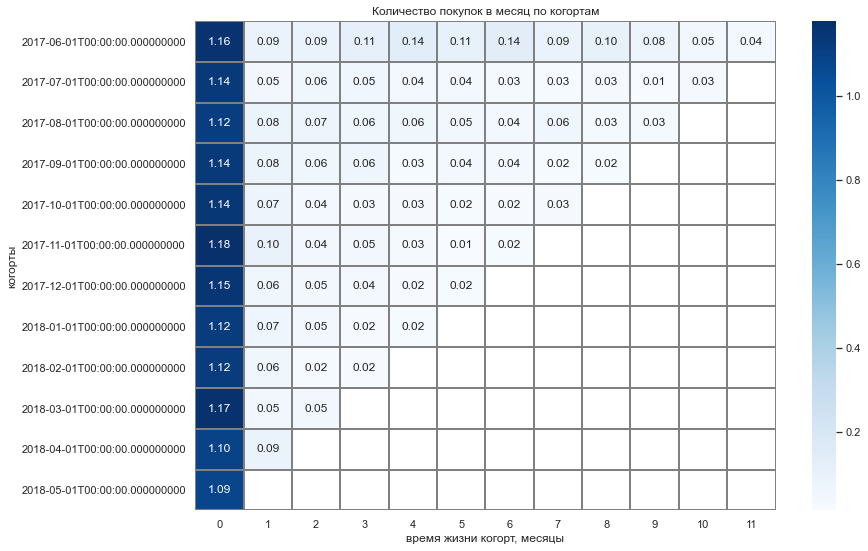

In [128]:
purchase_per_customer_pivot = cohorts_purchase_orders_data.pivot_table(
    index='cohort_order_month',
    columns='cohort_time',
    values='purchase_per_customer',
    aggfunc='sum',
) 

#display(purchase_per_customer_pivot.head(5))
#purchase_per_customer_pivot.info()
# .loc[:,1:11] - уберем нулевой месяц

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Количество покупок в месяц по когортам')
sns.heatmap(purchase_per_customer_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues')
plt.xlabel('время жизни когорт, месяцы')
plt.ylabel('когорты'); 
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#https://pythonru.com/biblioteki/seaborn-plot
# а как изменить отображение даты когорты на без часов?

Видим, что количество покупающих в каждой когорте уже на второй месяц ее жизни падает более, чем на порядок. В первую очереди из-за низкой возвращаемости когорты. Первая когорта опять с лучшими результатами. <br/>
Думаю, что просто в первую когорту попали все оптовые покупатели, существующие до того времени на сервисе. Поэтому и ее качество выше.

И посмотрим, как изменяется средняя частота покупок по всем когортам по нашему отчетному периоду.

In [129]:
mean = purchase_per_customer_pivot.mean()
display(mean)

cohort_time
0    1.14
1    0.07
2    0.05
3    0.05
4    0.05
5    0.04
6    0.05
7    0.04
8    0.05
9    0.04
10   0.04
11   0.04
dtype: float64

И, думаю, нам далее обязательно пригодится график изменения и количества покупок и суммы покупок по нашему отчетному периоду.

In [130]:
purchase_graph = orders_log_data_2.copy()
purchase_graph['order_date'] = purchase_graph['buy_ts'].dt.date
purchase_graph['order_month'] = purchase_graph['buy_ts'].values.astype('datetime64[M]')

purchase_graph = purchase_graph.loc[purchase_graph['revenue'] > 0]
purchase_graph_1 = purchase_graph.groupby(
    ['order_date']).agg(purchase_count=('revenue','count'), purchase_sum=('revenue','sum')).reset_index()
#purchase_all = purchase_all.sort_values(by='purchase_sum', ascending=False)
display(purchase_graph_1.head(5))
#purchase_graph.info()

,order_date,purchase_count,purchase_sum
0,2017-06-01,96,389.46
1,2017-06-02,111,324.11
2,2017-06-03,67,166.48
3,2017-06-04,66,195.21
4,2017-06-05,161,441.49


In [131]:
purchase_graph_1.describe()

,purchase_count,purchase_sum
count,364.00,364.00
mean,138.36,692.46
std,76.80,503.31
min,1.00,3.42
25%,82.75,378.91
50%,136.00,596.85
75%,177.00,869.78
max,814.00,4661.33


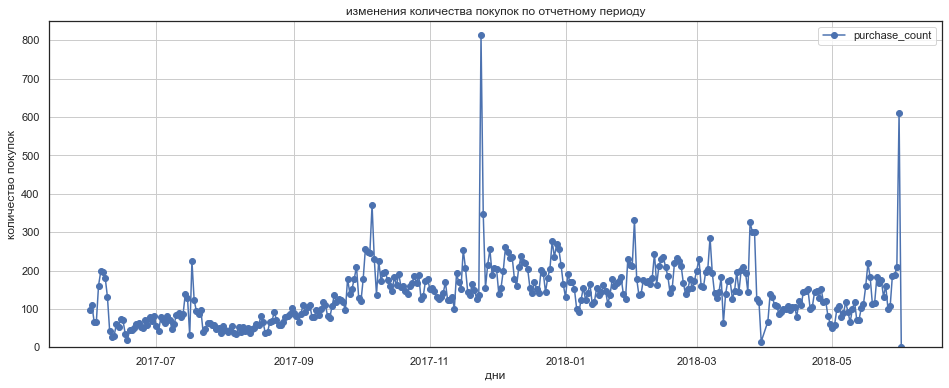

In [132]:
purchase_graph_1.plot(y='purchase_count', x='order_date', style='o-', ylim=(0, 850), grid=True, figsize=(16, 6))
plt.xlabel('дни')
plt.ylabel('количество покупок')
plt.title('изменения количества покупок по отчетному периоду')
plt.show()

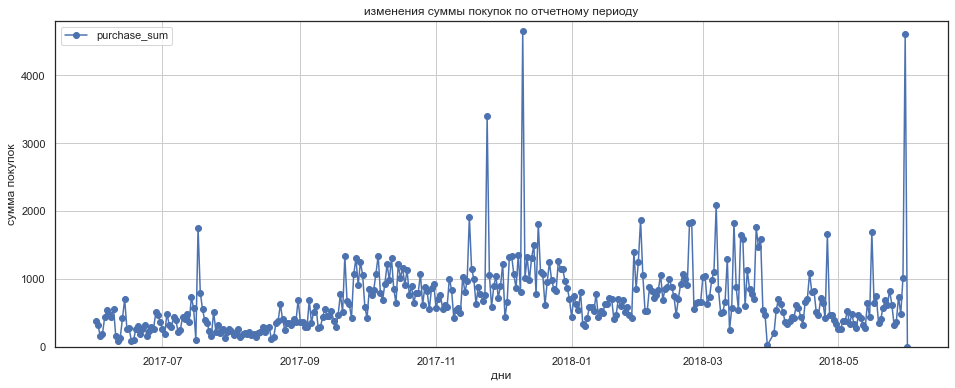

In [133]:
purchase_graph_1.plot(y='purchase_sum', x='order_date', style='o-', ylim=(0, 4800), grid=True, figsize=(16, 6))
plt.xlabel('дни')
plt.ylabel('сумма покупок')
plt.title('изменения суммы покупок по отчетному периоду')
plt.show()

Но полный разбор этих графиков подождет до сопоставления с рекламными акциями с нашими рекламными бюджетами.

<a name="chapter_3.2.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2.3. Cредний чек.</b> <br/>
</div>

Из задания: <br/>
2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;

In [134]:
purchase_graph_2 = purchase_graph.groupby(
    ['order_month']).agg(purchase_count=('revenue','nunique'), purchase_sum=('revenue','sum')).reset_index()
purchase_graph_2['average check'] = purchase_graph_2['purchase_sum'] / purchase_graph_2['purchase_count']
display(purchase_graph_2)

,order_month,purchase_count,purchase_sum,average check
0,2017-06-01,194,9557.49,49.27
1,2017-07-01,187,12539.47,67.06
2,2017-08-01,198,8758.78,44.24
3,2017-09-01,297,18345.51,61.77
4,2017-10-01,389,27987.70,71.95
5,2017-11-01,488,27069.93,55.47
6,2017-12-01,510,36388.60,71.35
7,2018-01-01,369,19417.13,52.62
8,2018-02-01,396,25560.54,64.55
9,2018-03-01,472,28834.59,61.09


В этот раз пока не будем убирать последний месяц - причина его ясна и разбиралась выше.

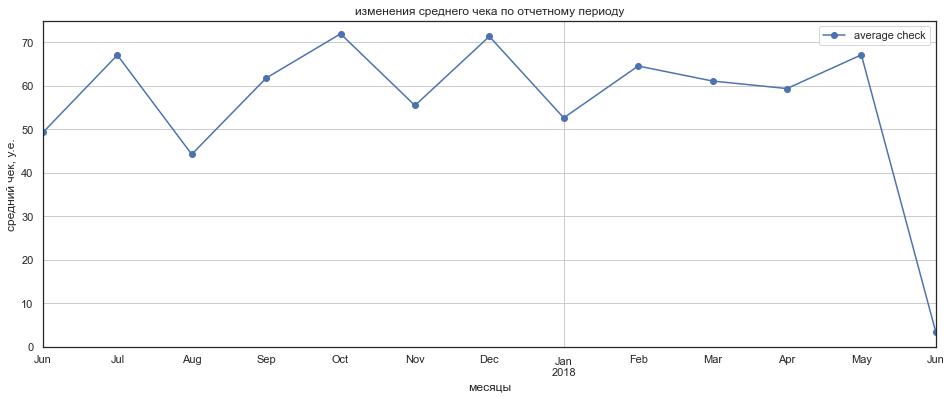

In [135]:
purchase_graph_2.plot(y='average check', x='order_month', style='o-', ylim=(0, 75), grid=True, figsize=(16, 6))
plt.xlabel('месяцы')
plt.ylabel('средний чек, у.е.')
plt.title('изменения среднего чека по отчетному периоду')
plt.show()

In [136]:
purchase_graph = purchase_graph.loc[purchase_graph['revenue'] > 0]
purchase_graph_2_1 = purchase_graph.groupby(
    ['order_month']).agg(purchase_count=('revenue','count'), purchase_sum=('revenue','sum')).reset_index()
purchase_graph_2_1['average check'] = purchase_graph_2_1['purchase_sum'] / purchase_graph_2_1['purchase_count']
display(purchase_graph_2_1)

,order_month,purchase_count,purchase_sum,average check
0,2017-06-01,2353,9557.49,4.06
1,2017-07-01,2362,12539.47,5.31
2,2017-08-01,1803,8758.78,4.86
3,2017-09-01,3383,18345.51,5.42
4,2017-10-01,5677,27987.70,4.93
5,2017-11-01,5644,27069.93,4.80
6,2017-12-01,6206,36388.60,5.86
7,2018-01-01,4721,19417.13,4.11
8,2018-02-01,5280,25560.54,4.84
9,2018-03-01,5325,28834.59,5.41


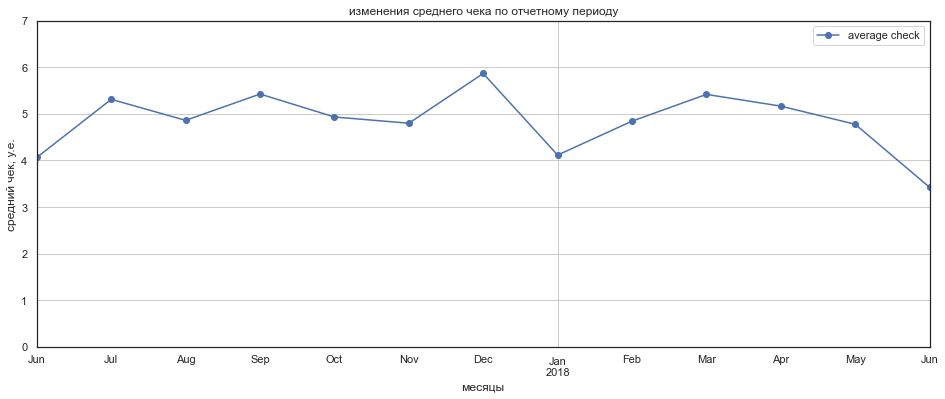

In [137]:
purchase_graph_2_1.plot(y='average check', x='order_month', style='o-', ylim=(0, 7), grid=True, figsize=(16, 6))
plt.xlabel('месяцы')
plt.ylabel('средний чек, у.е.')
plt.title('изменения среднего чека по отчетному периоду')
plt.show()

Средний чек на протяжении отчетного периода не имеет значимых изменений и колеблется от 4,06 до 5,86 у.е.

<a name="chapter_3.2.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2.4. LTV на покупателя по когортам.</b> <br/>
</div>

Из задания: <br/>
2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

Маржинальность сервиса — 100%. Интересно, а каким образом? Яндекс. Афиша является посредником, а не организатором событий, которые продает. Это означает, что в revenue уже стоит только прибыль, а не стоимость билетов? <br/>
Но тогда считаем сразу полную сумму.

In [138]:
display(cohorts_purchase_orders_data.head(5))

,cohort_order_month,cohort_time,cohort_order_user_count,cohort_order_count,cohort_order_sum,cohort_order_user_count_0,purchase_per_customer,ltv_customer
0,2017-06-01,0,2023,2354,9557.49,2023,1.16,4.72
1,2017-06-01,1,61,177,981.82,2023,0.09,0.49
2,2017-06-01,2,50,174,885.34,2023,0.09,0.44
3,2017-06-01,3,54,226,1931.30,2023,0.11,0.95
4,2017-06-01,4,88,292,2068.58,2023,0.14,1.02


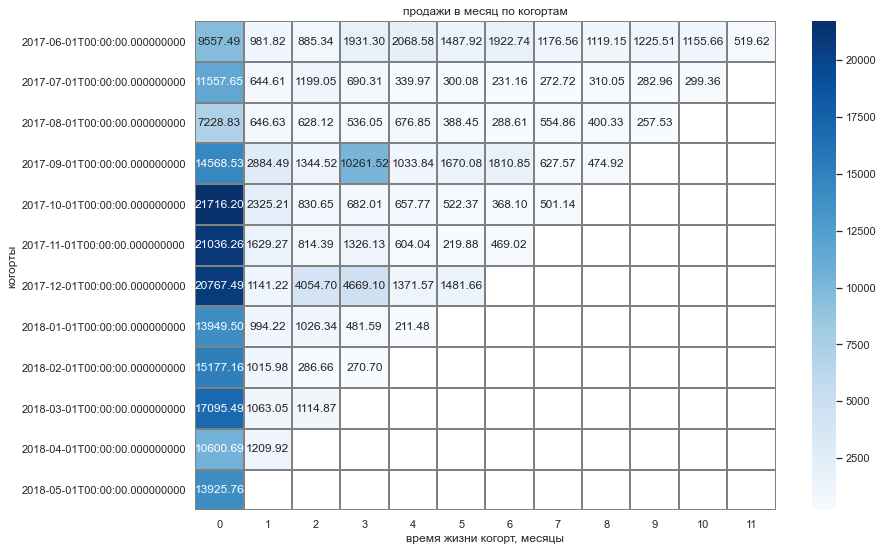

In [139]:
purchase_cohort_pivot = cohorts_purchase_orders_data.pivot_table(
    index='cohort_order_month',
    columns='cohort_time',
    values='cohort_order_sum',
    aggfunc='sum',
) 

#display(purchase_per_customer_pivot.head(5))
#purchase_per_customer_pivot.info()
# .loc[:,1:11] - уберем нулевой месяц

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('продажи в месяц по когортам')
sns.heatmap(purchase_cohort_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues')
plt.xlabel('время жизни когорт, месяцы')
plt.ylabel('когорты'); 
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#https://pythonru.com/biblioteki/seaborn-plot
# а как изменить отображение даты когорты на без часов?

Обратим внимание, что в некоторых когортах есть приличные суммарные продажи уже не в первые месяцы жизни, от 4054,70 до 10261,52 у.е.  Скорее всего - есть и вновь появившиеся оптовики в этих когортах... И лидерство первой когорты расстает...

In [140]:
display(purchase_cohort_pivot)

cohort_time,0,1,2,3,4,5,6,7,8,9,10,11
cohort_order_month,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07-01,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08-01,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN,NaN
2017-09-01,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN,NaN,NaN
2017-10-01,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN,NaN,NaN,NaN
2017-11-01,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,20767.49,1141.22,4054.70,4669.10,1371.57,1481.66,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,13949.50,994.22,1026.34,481.59,211.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,15177.16,1015.98,286.66,270.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ну и считаем LTV когорт

In [141]:
display(purchase_cohort_pivot.cumsum(axis=1).round(2).fillna(''))

cohort_time,0,1,2,3,4,5,6,7,8,9,10,11
cohort_order_month,,,,,,,,,,,,
2017-06-01,9557.49,10539.31,11424.65,13355.95,15424.53,16912.45,18835.19,20011.75,21130.90,22356.41,23512.07,24031.69
2017-07-01,11557.65,12202.26,13401.31,14091.62,14431.59,14731.67,14962.83,15235.55,15545.60,15828.56,16127.92,
2017-08-01,7228.83,7875.46,8503.58,9039.63,9716.48,10104.93,10393.54,10948.40,11348.73,11606.26,,
2017-09-01,14568.53,17453.02,18797.54,29059.06,30092.90,31762.98,33573.83,34201.40,34676.32,,,
2017-10-01,21716.20,24041.41,24872.06,25554.07,26211.84,26734.21,27102.31,27603.45,,,,
2017-11-01,21036.26,22665.53,23479.92,24806.05,25410.09,25629.97,26098.99,,,,,
2017-12-01,20767.49,21908.71,25963.41,30632.51,32004.08,33485.74,,,,,,
2018-01-01,13949.50,14943.72,15970.06,16451.65,16663.13,,,,,,,
2018-02-01,15177.16,16193.14,16479.80,16750.50,,,,,,,,


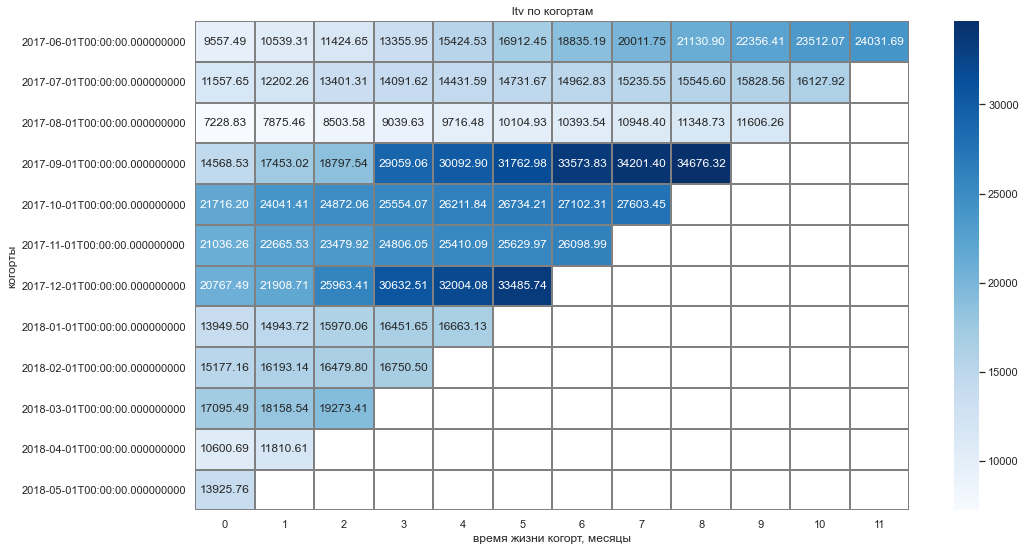

In [142]:
purchase_ltv_pivot = purchase_cohort_pivot.cumsum(axis=1).round(2)
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('ltv по когортам')
sns.heatmap(purchase_ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues')
plt.xlabel('время жизни когорт, месяцы')
plt.ylabel('когорты'); 
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#https://pythonru.com/biblioteki/seaborn-plot
# а как изменить отображение даты когорты на без часов?

Лидерами являются когорты: <br/>
2017-09-01 с суммой 3476,32;<br/>
2017-12-01 с суммой 33485,73;<br/>
2017-10-01 с суммой 27603,45<br/>
Причины - лучший старт когорты или необычная рекордная сумма за промежуточный месяц.

Считаем до когорты 2017-12-01 - по заданию нам надо показать только когорты с 6-ю месяцами жизни.
И если надо ограничить и посмотреть в графике:

In [143]:
cohorts_purchase_orders_data_6 = cohorts_purchase_orders_data.loc[
    cohorts_purchase_orders_data['cohort_order_month'] < '2018-01-01']

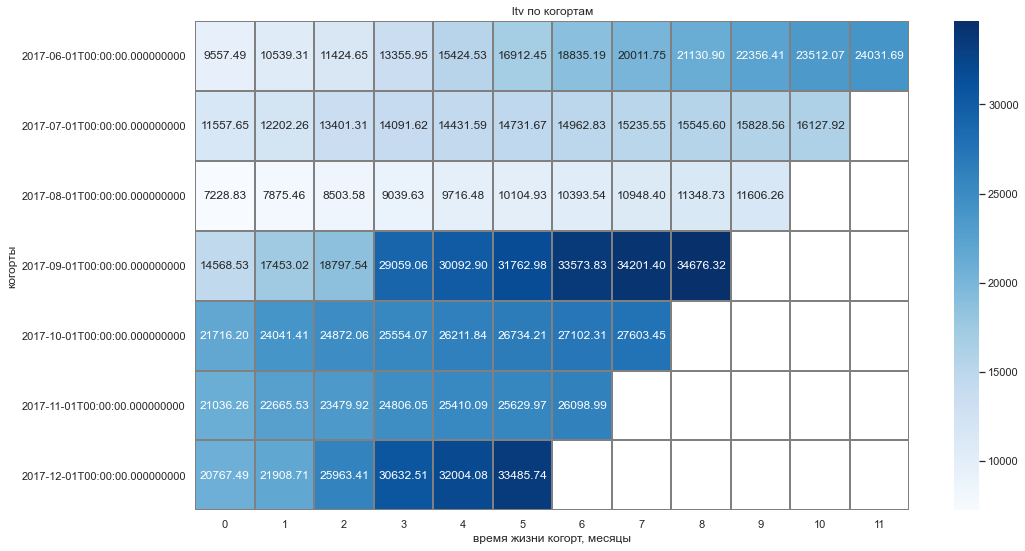

In [144]:
purchase_cohort_pivot_6 = cohorts_purchase_orders_data_6.pivot_table(
    index='cohort_order_month',
    columns='cohort_time',
    values='cohort_order_sum',
    aggfunc='sum',
) 

purchase_ltv_pivot_6 = purchase_cohort_pivot_6.cumsum(axis=1).round(2)
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('ltv по когортам')
sns.heatmap(purchase_ltv_pivot_6, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues')
plt.xlabel('время жизни когорт, месяцы')
plt.ylabel('когорты'); 
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#https://pythonru.com/biblioteki/seaborn-plot
# а как изменить отображение даты когорты на без часов?

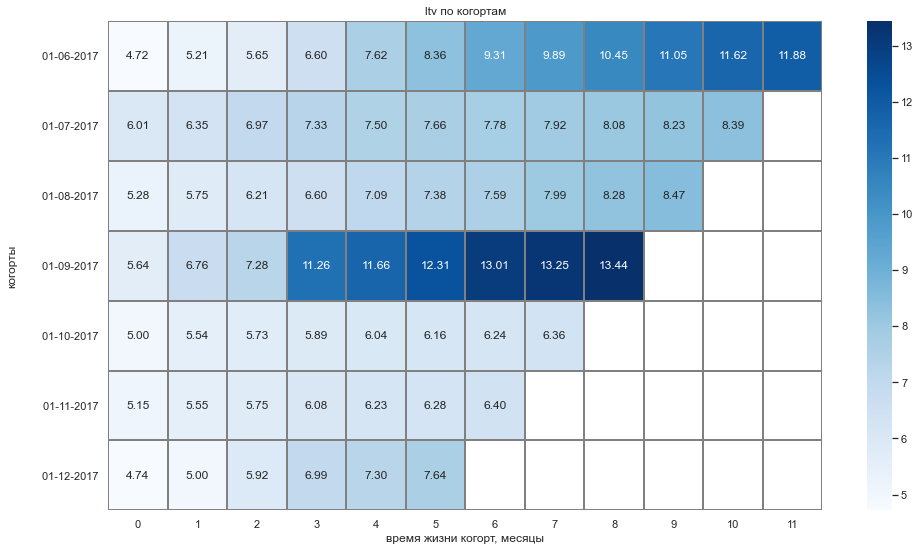

In [145]:
cohorts_purchase_orders_data_6 = cohorts_purchase_orders_data.loc[
    cohorts_purchase_orders_data['cohort_order_month'] < '2018-01-01']
purchase_cohort_pivot_6 = cohorts_purchase_orders_data_6.pivot_table(
    index='cohort_order_month',
    columns='cohort_time',
    values='ltv_customer',
    aggfunc='sum',
) 

purchase_ltv_pivot_6 = purchase_cohort_pivot_6.cumsum(axis=1).round(2)
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('ltv по когортам')
sns.heatmap(purchase_ltv_pivot_6, yticklabels=purchase_ltv_pivot_6.index.strftime('       %d-%m-%Y'), annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues')
plt.xlabel('время жизни когорт, месяцы')
plt.ylabel('когорты'); 
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
#https://pythonru.com/biblioteki/seaborn-plot
# а как изменить отображение даты когорты на без часов?

<a name="chapter_3.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.3. Маркетинговые метрики.</b> <br/>
</div>

<a name="chapter_3.3.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
3.3.1. Общая сумма расходов на маркетинг <br/>
</div>

Это мы уже считали ранее:

In [146]:
costs_data['costs'].sum()


329131.62

Общая сумма затрат - 329131.62 у.е. И это при общей сумме покупок в  252057,2 у.е. Сложная история...

Для начала, есть желание посмотреть рядом графики посещаемости сервиса (возьмем уникальных в сутки), уникальных отдельно по каждому источнику трафика, количества и суммы покупок, общей суммы рекламных затрат затрат в отдельности по каждому источнику трафика. Часть этого у нас уже есть, что-то надо построить вновь.

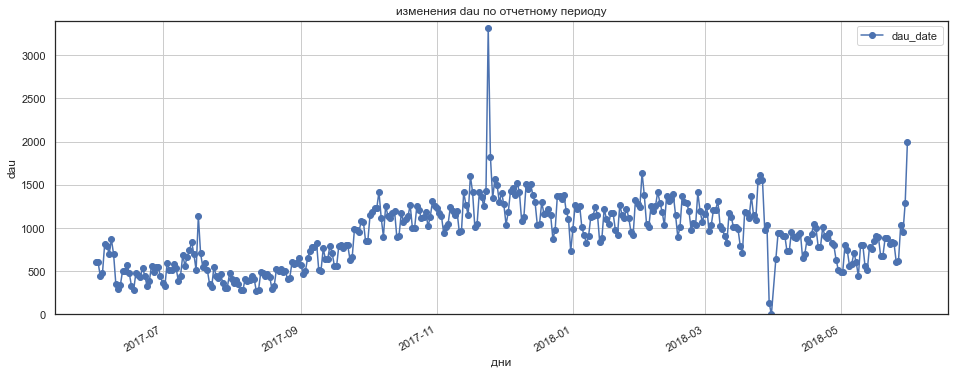

In [147]:
dau.plot(y='dau_date', x='session_date', style='o-', ylim=(0, 3400), grid=True, figsize=(16, 6))
plt.xlabel('дни')
plt.ylabel('dau')
plt.title('изменения dau по отчетному периоду')
plt.show()

Это по источникам трафика

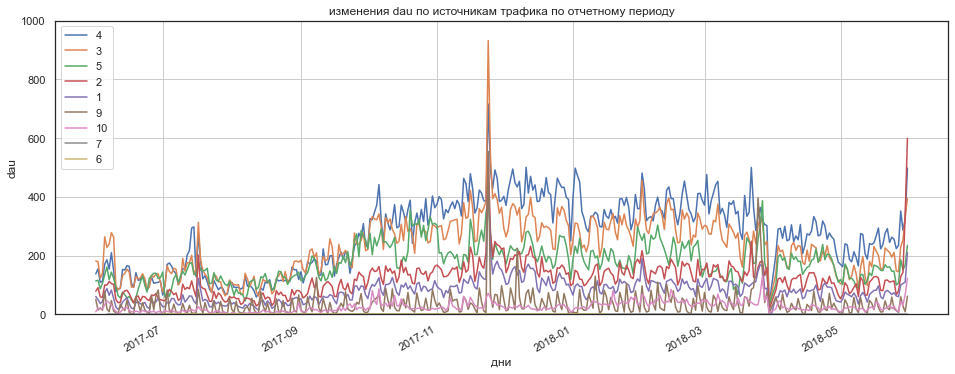

In [148]:
location = [4, 3, 5, 2, 1, 9, 10, 7, 6]
i = 0
fig, ax = plt.subplots()
for plat in location:
    visits_log_data_source_id = visits_log_data.copy()
    visits_log_data_source_id = visits_log_data_source_id.query('source_id == @plat')
    dau_1 = visits_log_data_source_id.groupby('session_date').agg(dau_date=('uid','nunique')).reset_index()                                        
    dau_1['session_date'] = pd.to_datetime(dau_1['session_date'], format='%Y-%m-%d')
    dau_1.plot(y='dau_date', x='session_date', style='', ylim=(0, 1000), grid=True, figsize=(16, 6), label = location[i], ax=ax)
    i += 1
plt.xlabel('дни')
plt.ylabel('dau')
plt.title('изменения dau по источникам трафика по отчетному периоду')
plt.show()


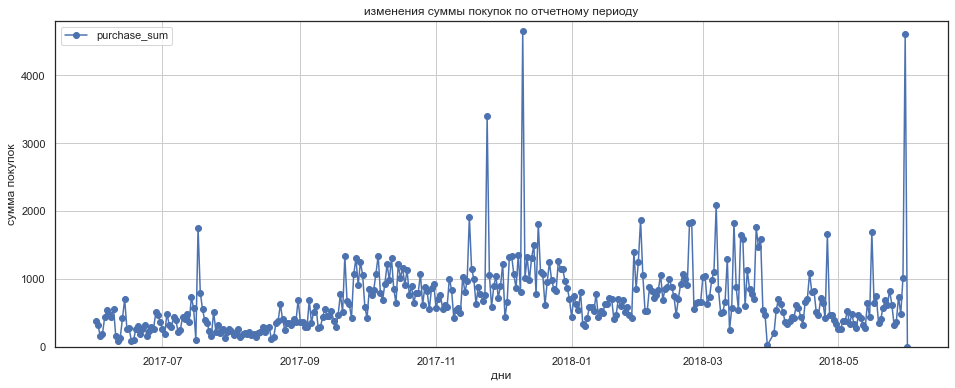

In [149]:
purchase_graph_1.plot(y='purchase_sum', x='order_date', style='o-', ylim=(0, 4800), grid=True, figsize=(16, 6))
plt.xlabel('дни')
plt.ylabel('сумма покупок')
plt.title('изменения суммы покупок по отчетному периоду')
plt.show()

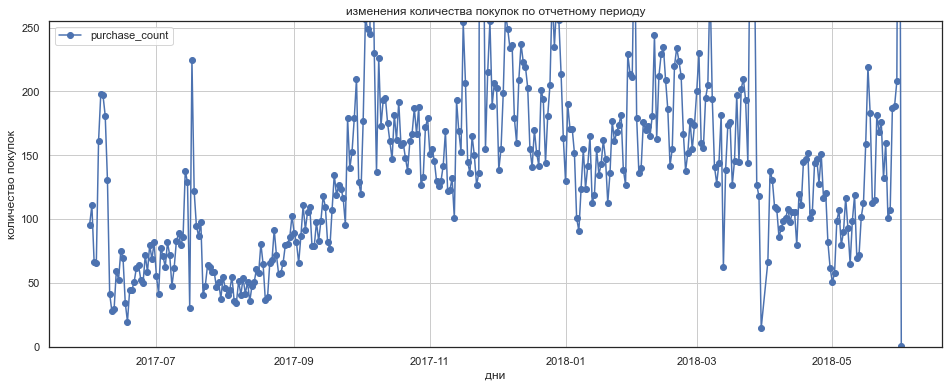

In [150]:
purchase_graph_1.plot(y='purchase_count', x='order_date', style='o-', ylim=(0, 255), grid=True, figsize=(16, 6))
plt.xlabel('дни')
plt.ylabel('количество покупок')
plt.title('изменения количества покупок по отчетному периоду')
plt.show()

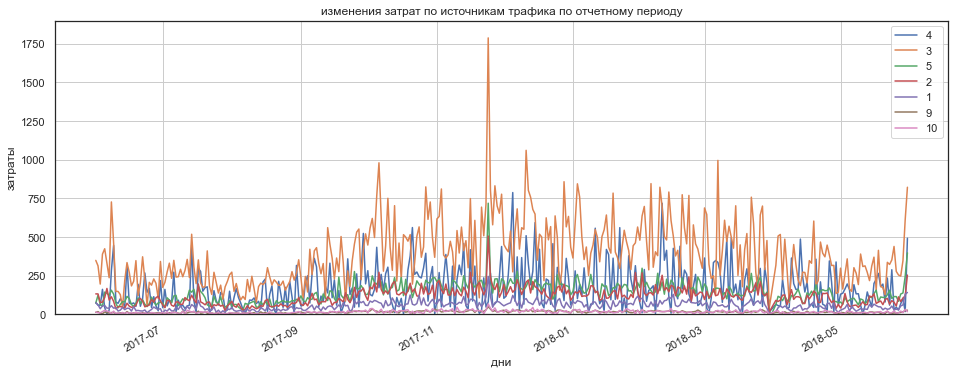

In [151]:
location = [4, 3, 5, 2, 1, 9, 10]
i = 0
fig, ax = plt.subplots()
for plat in location:
    costs_data_source_id = costs_data.copy()
    costs_data_source_id = costs_data_source_id.query('source_id == @plat')
    costs_source = costs_data_source_id.groupby('dt').agg(cost_date=('costs','sum')).reset_index()                                        
    costs_source['dt'] = pd.to_datetime(costs_source['dt'], format='%Y-%m-%d')
    costs_source.plot(y='cost_date', x='dt', style='', ylim=(0, 1900), grid=True, figsize=(16, 6), label = location[i], ax=ax)
    i += 1
plt.xlabel('дни')
plt.ylabel('затраты')
plt.title('изменения затрат по источникам трафика по отчетному периоду')
plt.show()

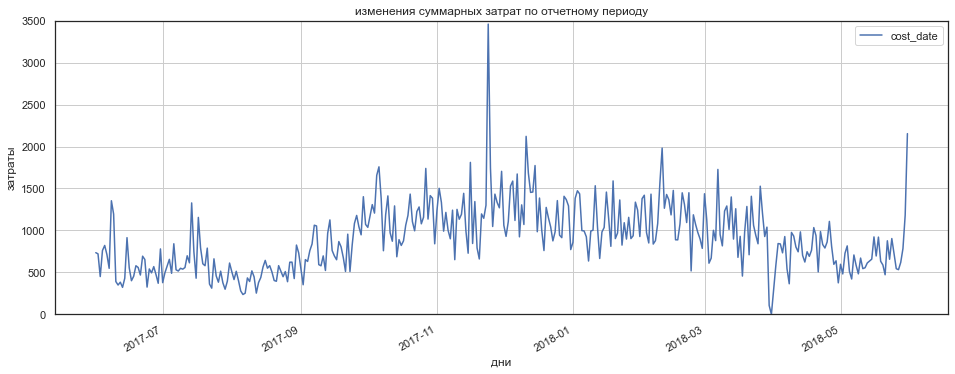

In [152]:
costs_data_all = costs_data.copy()
costs_data_all = costs_data_all.groupby('dt').agg(cost_date=('costs','sum')).reset_index()                                        
costs_data_all['dt'] = pd.to_datetime(costs_data_all['dt'], format='%Y-%m-%d')
costs_data_all.plot(y='cost_date', x='dt', style='', ylim=(0, 3500), grid=True, figsize=(16, 6))

plt.xlabel('дни')
plt.ylabel('затраты')
plt.title('изменения суммарных затрат по отчетному периоду')
plt.show()

Пока можно выделить пиковую реакцию на пиковые затраты и это очень похоже на реакцию, когда по всем источникам идет реклама определенной акции, назначенной на определенную дату. <br/>
И сильной корреляции  затрат, покупок и посещаемости тоже не вижу, все накладывается на более сильную стандартную сезонность. 

И для полноты картины можно посмотреть посещаемость по источникам трафика по атрибуции первого перехода. А тогда, пожалуй, и сможем покупки рассмотреть с точки зрения этой атрибуции. Только так мы сможем окрасить uid и приписать его какому-то виду трафика.


In [153]:
visits_log_data.info()
orders_log_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  object        
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  uint64        
 5   duration_ts    359400 non-null  int64         
 6   session_year   359400 non-null  int64         
 7   session_month  359400 non-null  int64         
 8   session_week   359400 non-null  UInt32        
 9   session_date   359400 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 26.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------

In [154]:
visits_log_data_sort = visits_log_data.sort_values(by='start_ts', ascending=True)
#display(visits_log_data_sort.head(5))
first_search_id = visits_log_data_sort.groupby('uid').agg(first_search_id=('source_id','first')).reset_index()
#first_search_id.info()
#display(first_search_id.head(5))
#first_search_id_2 = first_search_id.loc[first_search_id['uid'] == 13890188992670018146] #- проверка
#display(first_search_id_2)

In [155]:
orders_log_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy_ts            50415 non-null  datetime64[ns]
 1   revenue           50415 non-null  float64       
 2   uid               50415 non-null  uint64        
 3   first_order_date  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.9 MB


И присоединим эту таблицу к visits_log_data методом .merge по uid

In [156]:
orders_first_search_id = orders_log_data_2.merge(first_search_id, on=['uid'], how = 'left')
#orders_first_search_id.info()
display(orders_first_search_id.head(5))

,buy_ts,revenue,uid,first_order_date,first_search_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,3


In [157]:
purchase_graph_search = orders_first_search_id.copy()
purchase_graph_search['order_date'] = purchase_graph_search['buy_ts'].dt.date
purchase_graph_search['order_month'] = purchase_graph_search['buy_ts'].values.astype('datetime64[M]')
purchase_graph_search = purchase_graph_search.loc[purchase_graph_search['revenue'] > 0]

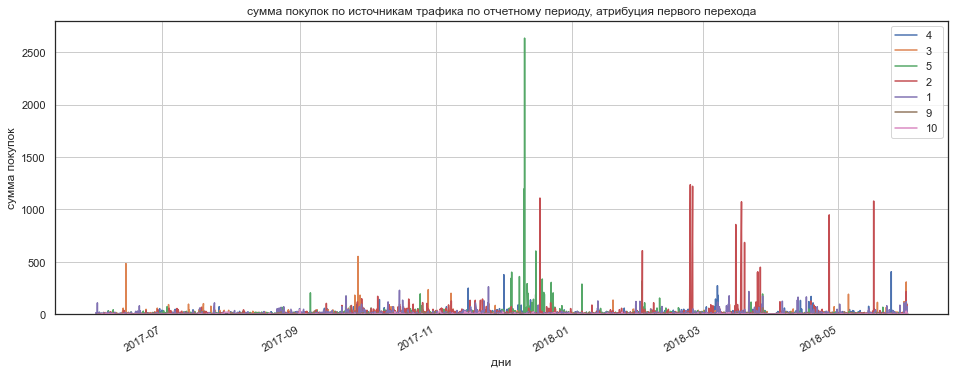

In [158]:
location = [4, 3, 5, 2, 1, 9, 10]
i = 0
fig, ax = plt.subplots()
for plat in location:
    purchase_data_source_id = purchase_graph_search.copy()
    purchase_data_source_id = purchase_data_source_id.query('first_search_id == @plat')
    purchase_source = purchase_data_source_id.groupby('buy_ts').agg(cost_date=('revenue','sum')).reset_index()                                        
    purchase_source['buy_ts'] = pd.to_datetime(purchase_source['buy_ts'], format='%Y-%m-%d')
    purchase_source.plot(y='cost_date', x='buy_ts', style='', ylim=(0, 2800), grid=True, figsize=(16, 6), label = location[i], ax=ax)
    i += 1
plt.xlabel('дни')
plt.ylabel('сумма покупок')
plt.title('сумма покупок по источникам трафика по отчетному периоду, атрибуция первого перехода')
plt.show()

Не очень выразительно. А как сделать это нарастающим итогом, пока не знаю и не умею. Правда, за последние два месяца я многому научился, с нуля! И это хорошо... <br/>
Хотя можно и по месяцам и отдельно диаграмму сделать, пока.

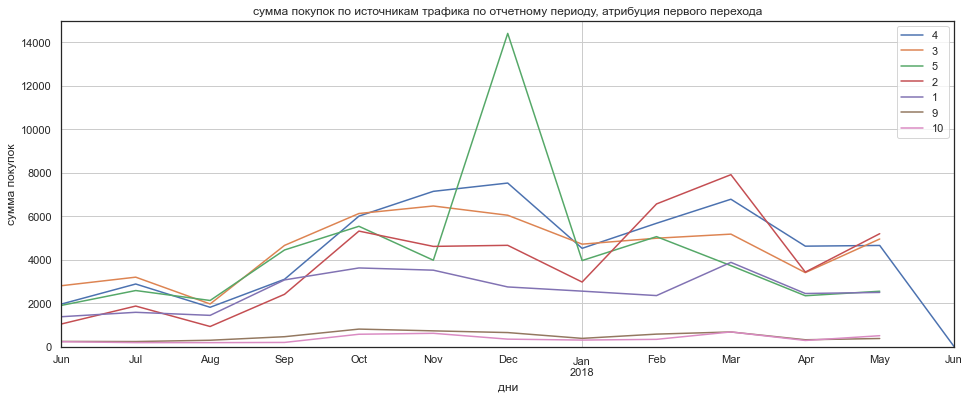

In [159]:
location = [4, 3, 5, 2, 1, 9, 10]
i = 0
fig, ax = plt.subplots()
for plat in location:
    purchase_data_source_id = purchase_graph_search.copy()
    purchase_data_source_id = purchase_data_source_id.query('first_search_id == @plat')
#    purchase_source = purchase_data_source_id.groupby('buy_ts').agg(cost_date=('revenue','sum')).reset_index()                                        

    purchase_source = purchase_data_source_id.groupby('order_month').agg(cost_date=('revenue','sum')).reset_index()
#    purchase_source['buy_ts'] = pd.to_datetime(purchase_source['buy_ts'], format='%Y-%m-%d')
#    purchase_source.plot(y='cost_date', x='buy_ts', style='', ylim=(0, 2800), grid=True, figsize=(16, 6), label = location[i], ax=ax)
    purchase_source.plot(y='cost_date', x='order_month', style='', ylim=(0, 15000), grid=True, figsize=(16, 6), label = location[i], ax=ax)
    i += 1
plt.xlabel('дни')
plt.ylabel('сумма покупок')
plt.title('сумма покупок по источникам трафика по отчетному периоду, атрибуция первого перехода')
plt.show()

In [160]:
purchase_source_all = purchase_graph_search.groupby('first_search_id').agg(purchase_source=('revenue','sum'))
#purchase_graph_search['revenue'].sum()
display(purchase_source_all)

,purchase_source
first_search_id,
1,31090.55
2,46923.61
3,54511.24
4,56696.83
5,52624.02
7,1.22
9,5759.40
10,4450.33


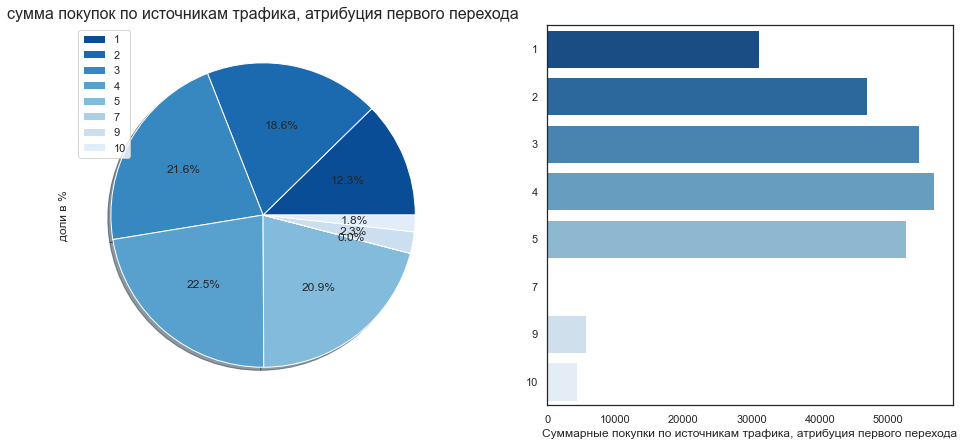

In [161]:
#source_id_cost  = costs_data.pivot_table(index='source_id', values='costs', aggfunc='sum'
#                                        ).sort_values('costs', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(purchase_source_all.values)
    
    
cmap = sns.color_palette('Blues_r', len(purchase_source_all.values))
    
purchase_source_all.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=purchase_source_all.index)
ax[0].set_title('сумма покупок по источникам трафика, атрибуция первого перехода', fontsize=16)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=purchase_source_all.index, x='purchase_source', data=purchase_source_all, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Суммарные покупки по источникам трафика, атрибуция первого перехода')
    
plt.show() 

<a name="chapter_3.3.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
3.3.2. Средний CAC на одного покупателя для всего проекта и для каждого источника трафика. <br/>
</div>

Из задания: <br/>
2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;    
    

Ну и сравним доходы с затратами

In [162]:
costs_data_search_sum = costs_data.copy()
costs_data_search_sum = costs_data_search_sum.groupby('source_id').agg(cost_sum=('costs','sum')).reset_index()
display(costs_data_search_sum)


,source_id,cost_sum
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [163]:
purchase_source_all = purchase_graph_search.groupby('first_search_id').agg(purchase_source=('revenue','sum')).reset_index()
#purchase_graph_search['revenue'].sum()
display(purchase_source_all)

,first_search_id,purchase_source
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [164]:
purchase_cost_source_all = purchase_source_all.merge(costs_data_search_sum, left_on='first_search_id', right_on='source_id', how = 'left')
#orders_first_search_id.info()
purchase_cost_source_all['cost_sum'] = purchase_cost_source_all['cost_sum'].fillna(0)
purchase_cost_source_all['source_id'] = purchase_cost_source_all['source_id'].fillna(7)
purchase_cost_source_all['purchase_source/cost_sum'] = purchase_cost_source_all['purchase_source'] / purchase_cost_source_all['cost_sum']
purchase_cost_source_all['purchase_minus_cost_sum'] = purchase_cost_source_all['purchase_source'] - purchase_cost_source_all['cost_sum']
purchase_cost_source_all = purchase_cost_source_all.sort_values(by='purchase_source/cost_sum', ascending=False)

display(purchase_cost_source_all)

,first_search_id,purchase_source,source_id,cost_sum,purchase_source/cost_sum,purchase_minus_cost_sum
5,7,1.22,7.00,0.00,inf,1.22
0,1,31090.55,1.00,20833.27,1.49,10257.28
1,2,46923.61,2.00,42806.04,1.10,4117.57
6,9,5759.40,9.00,5517.49,1.04,241.91
4,5,52624.02,5.00,51757.10,1.02,866.92
3,4,56696.83,4.00,61073.60,0.93,-4376.77
7,10,4450.33,10.00,5822.49,0.76,-1372.16
2,3,54511.24,3.00,141321.63,0.39,-86810.39


Если судить об эффективности, как соотношению суммарных покупок к суммарным затратам, то источники трафика ранжировали по атрибуции первого перехода. <br>
Но не зная характера источников трафика и их масштабируемости сложно судить о правильности распределения рекламного бюджета. <br/>
Основные вопросы возникают к источнику трафика под номером 3. Он у нас самый большой по затратам и самый низкий по коэффициенту отдачи. При затратах в 141321,63 и покупках в 54511,24 имеет коэффициент 0,39. <br/>
Ну а в лидерах источник 1, При затратах в 20833,27 и покупках в 31090,55 имеет коэффициент 1,49. 

CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании. <br/>
Ну а выше мы посчитали тот же CAC с точки зрения стоимости привлечения прибыли за счет расходов по каждому источнику трафика, атрибуция первого перехода.<br/>
Лидером источник 1, имеет прибыль в 10257,28. 
Источник 3 имеет убыток -86810,39. Но это опять же не повод махать шашкой и резать бюджет данного источника, атрибуция может быть разной и многоканальной. Да и кросс-девайс надо бы при этом смотреть.

А задание формулируется так: <br/>
2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;

У нас есть такие данные, вычисленные ранее

In [165]:
display(cohorts_purchase_orders_data.head(5))
cohorts_purchase_orders_data.info()

,cohort_order_month,cohort_time,cohort_order_user_count,cohort_order_count,cohort_order_sum,cohort_order_user_count_0,purchase_per_customer,ltv_customer
0,2017-06-01,0,2023,2354,9557.49,2023,1.16,4.72
1,2017-06-01,1,61,177,981.82,2023,0.09,0.49
2,2017-06-01,2,50,174,885.34,2023,0.09,0.44
3,2017-06-01,3,54,226,1931.30,2023,0.11,0.95
4,2017-06-01,4,88,292,2068.58,2023,0.14,1.02


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cohort_order_month         78 non-null     datetime64[ns]
 1   cohort_time                78 non-null     int64         
 2   cohort_order_user_count    78 non-null     int64         
 3   cohort_order_count         78 non-null     int64         
 4   cohort_order_sum           78 non-null     float64       
 5   cohort_order_user_count_0  78 non-null     int64         
 6   purchase_per_customer      78 non-null     float64       
 7   ltv_customer               78 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 5.5 KB


In [166]:
cohorts_purchase_orders_data_2 = cohorts_purchase_orders_data.groupby(
    'cohort_order_month').agg(cohort_order_sum_all=('cohort_order_sum','sum')).reset_index() 

display(cohorts_purchase_orders_data_2)

,cohort_order_month,cohort_order_sum_all
0,2017-06-01,24031.69
1,2017-07-01,16127.92
2,2017-08-01,11606.26
3,2017-09-01,34676.32
4,2017-10-01,27603.45
5,2017-11-01,26098.99
6,2017-12-01,33485.74
7,2018-01-01,16663.13
8,2018-02-01,16750.50
9,2018-03-01,19273.41


In [167]:
#df1=pd.DataFrame() https://askdev.ru/q/vybor-neskolkih-stolbcov-v-pandy-freyma-dannyh-1668/
#df1=df[['b','c']]
cohorts_purchase_orders_data_3 = pd.DataFrame()
cohorts_purchase_orders_data_3 = cohorts_purchase_orders_data[['cohort_order_month','cohort_order_user_count_0']]
cohorts_purchase_orders_data_3 = cohorts_purchase_orders_data_3.groupby(
    'cohort_order_month').agg(cohort_order_user_count_0=('cohort_order_user_count_0','min')).reset_index() 
display(cohorts_purchase_orders_data_3)

,cohort_order_month,cohort_order_user_count_0
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Объединим таблицы.

In [168]:
cohorts_purchase_orders_data_2 = cohorts_purchase_orders_data_2.merge(
    cohorts_purchase_orders_data_3, on=['cohort_order_month'], how = 'outer')
display(cohorts_purchase_orders_data_2)

,cohort_order_month,cohort_order_sum_all,cohort_order_user_count_0
0,2017-06-01,24031.69,2023
1,2017-07-01,16127.92,1923
2,2017-08-01,11606.26,1370
3,2017-09-01,34676.32,2581
4,2017-10-01,27603.45,4340
5,2017-11-01,26098.99,4081
6,2017-12-01,33485.74,4383
7,2018-01-01,16663.13,3373
8,2018-02-01,16750.50,3651
9,2018-03-01,19273.41,3533


Готовим данные по затратам

In [169]:
costs_data_month = costs_data.copy()
costs_data_month['cost_month'] = costs_data_month['dt'].values.astype('datetime64[M]')
costs_data_month = costs_data_month.groupby('cost_month').agg(cost_date_sum=('costs','sum')).reset_index()                                        
#costs_data_day['cost_day'] = pd.to_datetime(costs_data_day['dt'], format='%Y-%m-%d')
#costs_data_day['cost_day'] = costs_data_day['cost_day'].dt.date
#purchase_orders_data_2['cohort_order_month'] = purchase_orders_data_2['first_order_date'].values.astype('datetime64[M]')
costs_data_month.info()
display(costs_data_month)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cost_month     12 non-null     datetime64[ns]
 1   cost_date_sum  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 320.0 bytes


,cost_month,cost_date_sum
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Объединяем две таблицы методом .merge по cohort_order_month и cost_month и видим CAC по когортам. Можно и на одного клиента в когорте, данные есть.

In [170]:
cohorts_purchase_orders_data_4 = cohorts_purchase_orders_data_2.merge(
    costs_data_month, left_on='cohort_order_month', right_on='cost_month', how = 'left')
cohorts_purchase_orders_data_4['ltv_one_client_c'] = cohorts_purchase_orders_data_4['cohort_order_sum_all'] / cohorts_purchase_orders_data_4['cohort_order_user_count_0']
cohorts_purchase_orders_data_4['cac_one_client_c'] = cohorts_purchase_orders_data_4['cost_date_sum'] / cohorts_purchase_orders_data_4['cohort_order_user_count_0']
cohorts_purchase_orders_data_4['ltv_minus_cac'] = cohorts_purchase_orders_data_4['ltv_one_client_c'] - cohorts_purchase_orders_data_4['cac_one_client_c']
cohorts_purchase_orders_data_4['gp'] = cohorts_purchase_orders_data_4['cohort_order_sum_all'] - cohorts_purchase_orders_data_4['cost_date_sum']
display(cohorts_purchase_orders_data_4)

,cohort_order_month,cohort_order_sum_all,cohort_order_user_count_0,cost_month,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,gp
0,2017-06-01,24031.69,2023,2017-06-01,18015.00,11.88,8.91,2.97,6016.69
1,2017-07-01,16127.92,1923,2017-07-01,18240.59,8.39,9.49,-1.10,-2112.67
2,2017-08-01,11606.26,1370,2017-08-01,14790.54,8.47,10.80,-2.32,-3184.28
3,2017-09-01,34676.32,2581,2017-09-01,24368.91,13.44,9.44,3.99,10307.41
4,2017-10-01,27603.45,4340,2017-10-01,36322.88,6.36,8.37,-2.01,-8719.43
5,2017-11-01,26098.99,4081,2017-11-01,37907.88,6.40,9.29,-2.89,-11808.89
6,2017-12-01,33485.74,4383,2017-12-01,38315.35,7.64,8.74,-1.10,-4829.61
7,2018-01-01,16663.13,3373,2018-01-01,33518.52,4.94,9.94,-5.00,-16855.39
8,2018-02-01,16750.50,3651,2018-02-01,32723.03,4.59,8.96,-4.37,-15972.53
9,2018-03-01,19273.41,3533,2018-03-01,30415.27,5.46,8.61,-3.15,-11141.86


Если считать, что вся сумма затрат у нас тратится каждый месяц только на привлечение клиентов когорты этого месяца, что не совсем верно, то можем сказать, что рентабельными оказались только когорты:
2017-06-01 и 2017-09-01

Заодно уж, раз все данные есть, построим отдельно данные по затратам, доходам и рентабельности рекламы относительно расходов

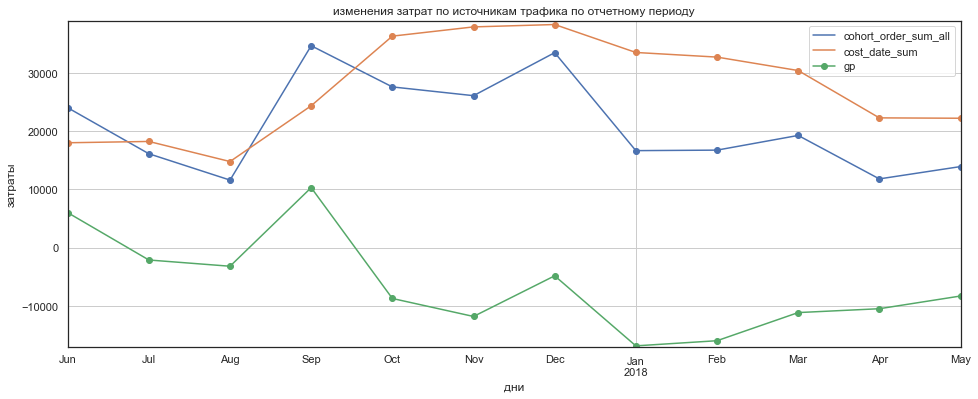

In [171]:
fig, ax = plt.subplots()
cohorts_purchase_orders_data_4.plot(y='cohort_order_sum_all', x='cohort_order_month', style='o-', ylim=(0, 39000), grid=True, figsize=(16, 6), ax=ax)
cohorts_purchase_orders_data_4.plot(y='cost_date_sum', x='cohort_order_month', style='o-', ylim=(0, 39000), grid=True, figsize=(16, 6), ax=ax)
cohorts_purchase_orders_data_4.plot(y='gp', x='cohort_order_month', style='o-', ylim=(-17000, 39000), grid=True, figsize=(16, 6), ax=ax)
plt.xlabel('дни')
plt.ylabel('затраты')
plt.title('изменения затрат по источникам трафика по отчетному периоду')
plt.show()

In [172]:
cohorts_purchase_orders_data_4['cohort_order_sum_all'].sum()

252053.78000000003

In [173]:
cohorts_purchase_orders_data_4['cost_date_sum'].sum()

329131.62

Было 252057.2 и  329131.62, разница в доходах на сумму убранной из подсчета суммы за одну покупку за 2018-06-01 <br/>
Стало быть, ничего не потеряли по ходу дела ни по доходам, ни по затратам, что радует ))

In [174]:
cac_one_customer = cohorts_purchase_orders_data_4['cost_date_sum'].sum() / cohorts_purchase_orders_data_4['cohort_order_user_count_0'].sum()
print('CAC на одного клиента', cac_one_customer)


CAC на одного клиента 9.011872843765401


In [175]:
orders_first_search_id = orders_first_search_id.loc[orders_first_search_id['revenue'] > 0]
search_user_count = orders_first_search_id.groupby('first_search_id').agg(search_user_count=('uid','nunique')).reset_index() 

search_user_count = search_user_count.merge(costs_data_search_sum, left_on='first_search_id', right_on='source_id', how = 'left')
search_user_count['cac_source_id'] = search_user_count['cost_sum'] / search_user_count['search_user_count']
display(search_user_count.head(5))

,first_search_id,search_user_count,source_id,cost_sum,cac_source_id
0,1,2896,1.00,20833.27,7.19
1,2,3503,2.00,42806.04,12.22
2,3,10467,3.00,141321.63,13.50
3,4,10296,4.00,61073.60,5.93
4,5,6931,5.00,51757.10,7.47


<a name="chapter_3.3.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
3.3.3. ROMI по когортам в разрезе источников. <br/>
</div>

Из задания: <br/>
2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

Да, хотел бы сказать, что не понимаю полностью формулировки "Рассчитайте ROMI по когортам в разрезе источников". Но мне кажется, что выше рентабельность источников трафика по отчетному периоду вполне показана.

In [176]:
display(purchase_cost_source_all)

,first_search_id,purchase_source,source_id,cost_sum,purchase_source/cost_sum,purchase_minus_cost_sum
5,7,1.22,7.00,0.00,inf,1.22
0,1,31090.55,1.00,20833.27,1.49,10257.28
1,2,46923.61,2.00,42806.04,1.10,4117.57
6,9,5759.40,9.00,5517.49,1.04,241.91
4,5,52624.02,5.00,51757.10,1.02,866.92
3,4,56696.83,4.00,61073.60,0.93,-4376.77
7,10,4450.33,10.00,5822.49,0.76,-1372.16
2,3,54511.24,3.00,141321.63,0.39,-86810.39


Собственно, колонка purchase_source/cost_sum и есть конечный ROMI, здесь это скорее уже ROI   для отдельных источников трафика.

Платные источники 1, 2, 9, 5 - рентабельны, 4, 10 и 3 - убыточны. Но для выводов мне не хватает знания источников трафика, акцентов проводимых рекламных кампаний и еще некоторых характеристик, типа кросс-девайс, кросс-источник трафика и прочее. Надо более полно смотреть. <br/>
И, главное -  нет данных о возможной масштабируемости источников трафика. Без этого знания - что можно советовать?

И, напоминаю, выше мы уже смотрели доходы и затраты по разным источникам трафика, если доходы приписать к источникам трафика по атрибуции первого перехода.

In [177]:
display(orders_first_search_id.head(5))

,buy_ts,revenue,uid,first_order_date,first_search_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,3


Если эту таблицу обрезать по определенному определенному первому трафику, то далее эту таблицу можно связать с таблицей затрат по месяцам, что ниже -   именно этого вида трафика. Тогда можно сформировать когорты по месяцу появления нового клиента для каждого вида трафика в отдельности и тогда можно по каждому типу трафика посчитать ltv cac и romi. <br/>
Фактически надо сделать 7 отдельных таблиц новых по отдельному типу трафика.<br/>
Если это и имелось сутью в задании, что не факт - то вряд ли мы увидим там что-то интересное, исходя тех графиков и доходов и затрат, что мы уже видели выше, сделанных именно по отдельному виду источника трафика. Что, правда, тоже не факт... <br/>
Ладно, глаза боятся, руки делают ))


In [178]:
orders_first_search_id_2 = orders_first_search_id.copy()
orders_first_search_id_2['order_month'] = orders_first_search_id_2['buy_ts'].values.astype('datetime64[M]')
orders_first_search_id_2['cohort_order_month'] = orders_first_search_id_2['first_order_date'].values.astype('datetime64[M]')
orders_first_search_id_2['cohort_time'] = orders_first_search_id_2['order_month'] - orders_first_search_id_2['cohort_order_month']
orders_first_search_id_2['cohort_time'] = orders_first_search_id_2['cohort_time'] / np.timedelta64(1, 'M')
orders_first_search_id_2['cohort_time'] = orders_first_search_id_2['cohort_time'].round().astype('int') 
orders_first_search_id_2.info()
display(orders_first_search_id_2.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50364 entries, 0 to 50414
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              50364 non-null  datetime64[ns]
 1   revenue             50364 non-null  float64       
 2   uid                 50364 non-null  uint64        
 3   first_order_date    50364 non-null  datetime64[ns]
 4   first_search_id     50364 non-null  int64         
 5   order_month         50364 non-null  datetime64[ns]
 6   cohort_order_month  50364 non-null  datetime64[ns]
 7   cohort_time         50364 non-null  int32         
dtypes: datetime64[ns](4), float64(1), int32(1), int64(1), uint64(1)
memory usage: 3.3 MB


,buy_ts,revenue,uid,first_order_date,first_search_id,order_month,cohort_order_month,cohort_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,1,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,3,2017-06-01,2017-06-01,0


Считаем количество уникальных покупателей по когортам. И покупки с нулевым revenue убираем. Давайте и уберем нашу единственную покупку 2018-06-01 - для красоты и для того, чтобы правильнее посчитать среднее количество покупок в конце по месяцу.
Учитывая, что нам еще LTV считать, то сразу посчитаем и сумму.

In [179]:
orders_first_search_id_2 = orders_first_search_id_2.loc[orders_first_search_id_2['revenue'] > 0]
orders_first_search_id_2 = orders_first_search_id_2.loc[orders_first_search_id_2['buy_ts'] < '2018-06-01']
orders_first_search_id_2 = orders_first_search_id_2.sort_values(by='buy_ts', ascending=True)
display(orders_first_search_id_2.head(10))
#orders_first_search_id_2 = orders_first_search_id_2.groupby(
#    ['cohort_order_month','cohort_time']).agg(cohort_order_user_count=(
#    'uid','nunique'), cohort_order_sum=('revenue','sum'), first_search_id=('first_search_id','sum')).reset_index()
#display(orders_first_search_id_2.head(5))

,buy_ts,revenue,uid,first_order_date,first_search_id,order_month,cohort_order_month,cohort_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,1,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,3,2017-06-01,2017-06-01,0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,3,2017-06-01,2017-06-01,0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,5,2017-06-01,2017-06-01,0
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,1,2017-06-01,2017-06-01,0
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,4,2017-06-01,2017-06-01,0
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,1,2017-06-01,2017-06-01,0


In [180]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [181]:
costs_data_month_2 = costs_data.copy()
costs_data_month_2['cost_month'] = costs_data_month_2['dt'].values.astype('datetime64[M]')
display(costs_data_month_2.head(5))

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [182]:
costs_data_month_4 = costs_data_month_2.loc[costs_data_month_2['source_id'] == 1]
costs_data_month_4 = costs_data_month_4.groupby('cost_month').agg(cost_date_sum=('costs','sum')).reset_index()
display(costs_data_month_4)

,cost_month,cost_date_sum
0,2017-06-01,1125.61
1,2017-07-01,1072.88
2,2017-08-01,951.81
3,2017-09-01,1502.01
4,2017-10-01,2315.75
5,2017-11-01,2445.16
6,2017-12-01,2341.20
7,2018-01-01,2186.18
8,2018-02-01,2204.48
9,2018-03-01,1893.09


А сейчас пишем функцию, чтобы выдать LTV по каждому источнику трафика

In [183]:
orders_first_search_id_3 = orders_first_search_id_2.loc[orders_first_search_id_2['first_search_id'] == 1]
#display(orders_first_search_id_3)
orders_first_search_id_3 = orders_first_search_id_3.groupby(
['cohort_order_month','cohort_time']).agg(cohort_order_user_count=(
'uid','nunique'), cohort_order_sum=('revenue','sum'), first_search_id=('first_search_id','first')).reset_index()
initial_users_count = orders_first_search_id_3[orders_first_search_id_3['cohort_time'] == 0][['cohort_order_month', 'cohort_order_user_count']]
columns_new = ['cohort_order_month', 'cohort_order_user_count_0']
initial_users_count.set_axis(columns_new, axis='columns', inplace=True)
orders_first_search_id_3 = orders_first_search_id_3.merge(initial_users_count, on=['cohort_order_month'], how = 'left')
costs_data_month_3 = costs_data_month_2.loc[costs_data_month_2['source_id'] == 1]
costs_data_month_3 = costs_data_month_3.groupby('cost_month').agg(cost_date_sum=('costs','sum')).reset_index()
cohorts_purchase_orders_data_5 = orders_first_search_id_3.merge(
costs_data_month_3, left_on='cohort_order_month', right_on='cost_month', how = 'left')
cohorts_purchase_orders_data_5['ltv_first_source'] = cohorts_purchase_orders_data_5['cohort_order_sum'] / cohorts_purchase_orders_data_5['cohort_order_user_count_0']
display(cohorts_purchase_orders_data_5)

,cohort_order_month,cohort_time,cohort_order_user_count,cohort_order_sum,first_search_id,cohort_order_user_count_0,cost_month,cost_date_sum,ltv_first_source
0,2017-06-01,0,190,1378.70,1,190,2017-06-01,1125.61,7.26
1,2017-06-01,1,16,414.98,1,190,2017-06-01,1125.61,2.18
2,2017-06-01,2,10,419.43,1,190,2017-06-01,1125.61,2.21
3,2017-06-01,3,9,714.24,1,190,2017-06-01,1125.61,3.76
4,2017-06-01,4,12,811.20,1,190,2017-06-01,1125.61,4.27
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,1,10,544.81,1,281,2018-03-01,1893.09,1.94
74,2018-03-01,2,10,221.64,1,281,2018-03-01,1893.09,0.79
75,2018-04-01,0,178,842.12,1,178,2018-04-01,1327.49,4.73
76,2018-04-01,1,6,48.24,1,178,2018-04-01,1327.49,0.27


In [184]:

def ltv_first_source_id(plat):
    orders_first_search_id_3 = orders_first_search_id_2.loc[orders_first_search_id_2['first_search_id'] == plat]
    #display(orders_first_search_id_3)
    orders_first_search_id_3 = orders_first_search_id_3.groupby(
        ['cohort_order_month','cohort_time']).agg(cohort_order_user_count=(
        'uid','nunique'), cohort_order_sum=('revenue','sum'), first_search_id=('first_search_id','first')).reset_index()
    initial_users_count = orders_first_search_id_3[orders_first_search_id_3['cohort_time'] == 0][['cohort_order_month', 'cohort_order_user_count']]
    columns_new = ['cohort_order_month', 'cohort_order_user_count_0']
    initial_users_count.set_axis(columns_new, axis='columns', inplace=True)
    orders_first_search_id_3 = orders_first_search_id_3.merge(initial_users_count, on=['cohort_order_month'], how = 'left')
    costs_data_month_3 = costs_data_month_2.loc[costs_data_month_2['source_id'] == plat]
    costs_data_month_3 = costs_data_month_3.groupby('cost_month').agg(cost_date_sum=('costs','sum')).reset_index()
    cohorts_purchase_orders_data_5 = orders_first_search_id_3.merge(
        costs_data_month_3, left_on='cohort_order_month', right_on='cost_month', how = 'left')
    cohorts_purchase_orders_data_5['ltv_first_source'] = cohorts_purchase_orders_data_5['cohort_order_sum'] / cohorts_purchase_orders_data_5['cohort_order_user_count_0']
    purchase_cohort_pivot_7 = cohorts_purchase_orders_data_5.pivot_table(
        index='cohort_order_month',
        columns='cohort_time',
        values='ltv_first_source',
        aggfunc='sum',
    ) 

    purchase_cohort_pivot_7 = purchase_cohort_pivot_7.cumsum(axis=1).round(2)
    sns.set(style='white')
    plt.figure(figsize=(16, 9))
    plt.title('ltv по когортам')
    sns.heatmap(purchase_cohort_pivot_7, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues')
    plt.xlabel('время жизни когорт, месяцы')
    plt.ylabel('когорты');
    return

LTV по источнику трафика 1

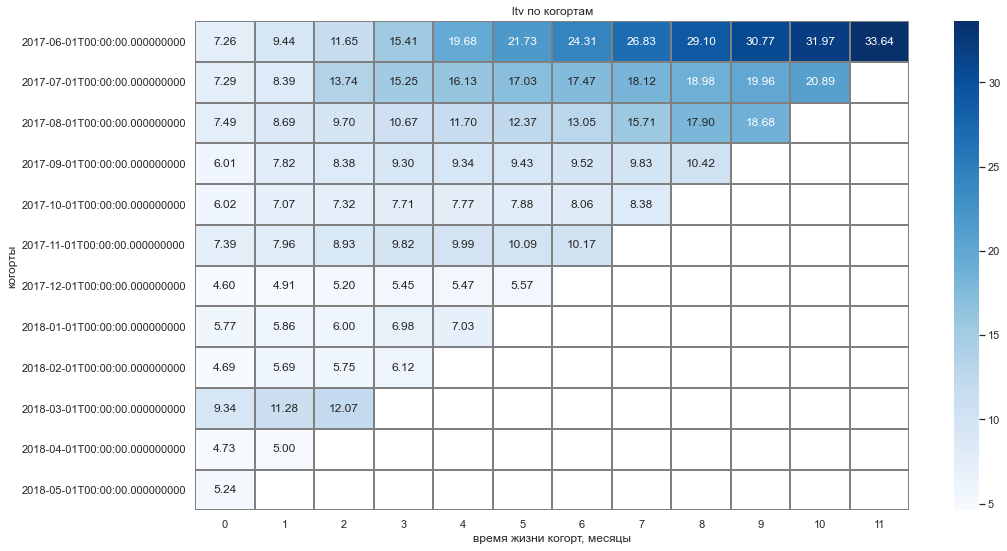

In [185]:
ltv_first_source_id(1)

LTV по источнику трафика 2

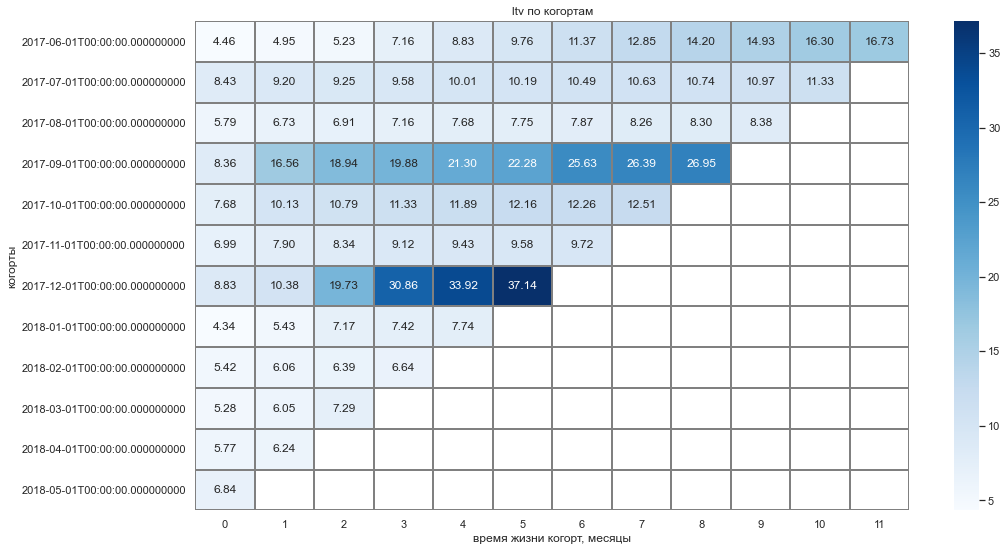

In [186]:
ltv_first_source_id(2)

LTV по источнику трафика 9

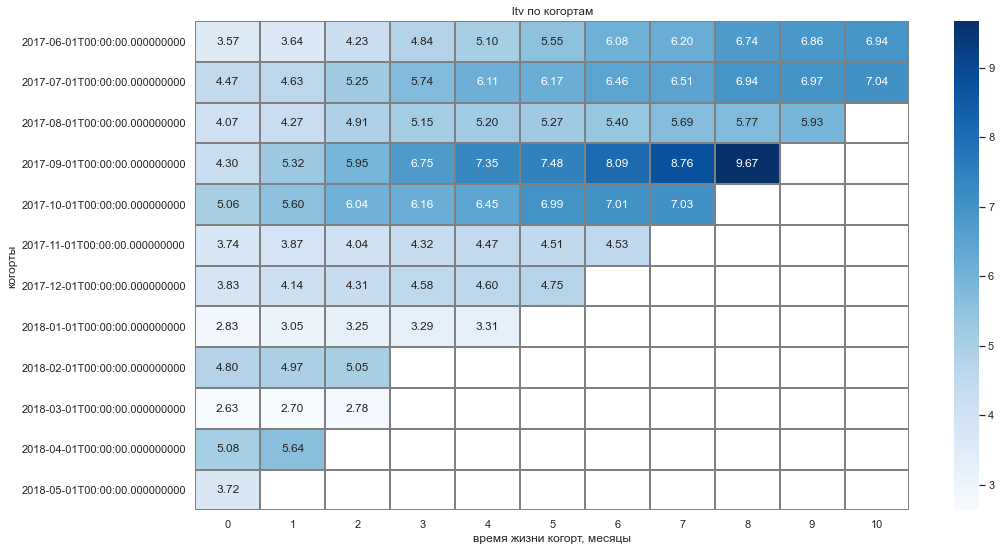

In [187]:
ltv_first_source_id(9)

LTV по источнику трафика 5

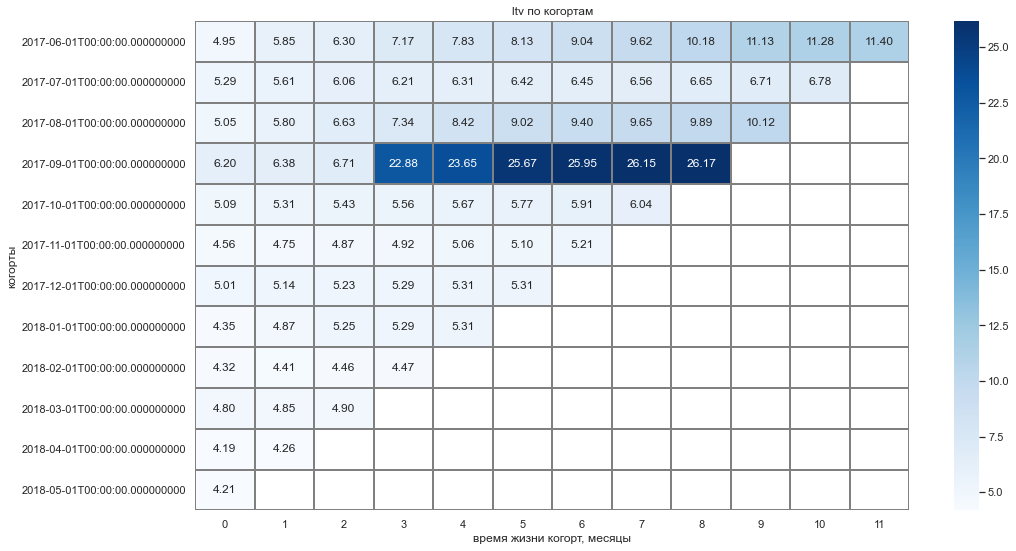

In [188]:
ltv_first_source_id(5)

LTV по источнику трафика 4

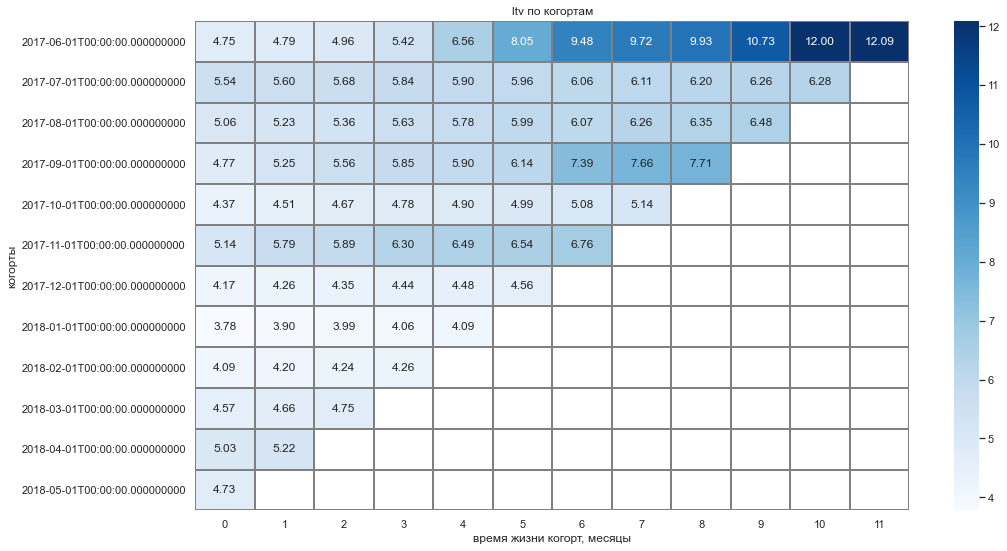

In [189]:
ltv_first_source_id(4)

LTV по источнику трафика 10

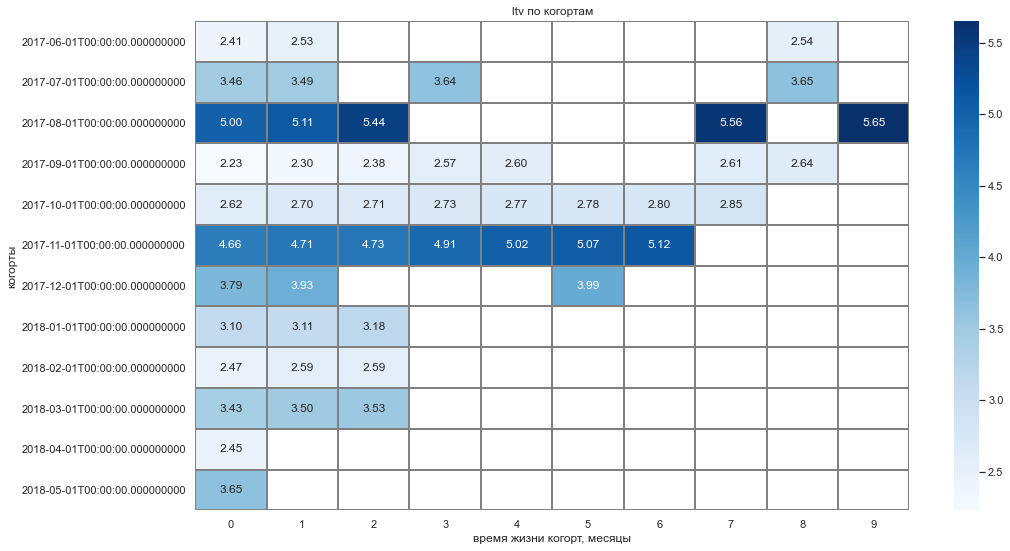

In [190]:
ltv_first_source_id(10)

LTV по источнику трафика 3

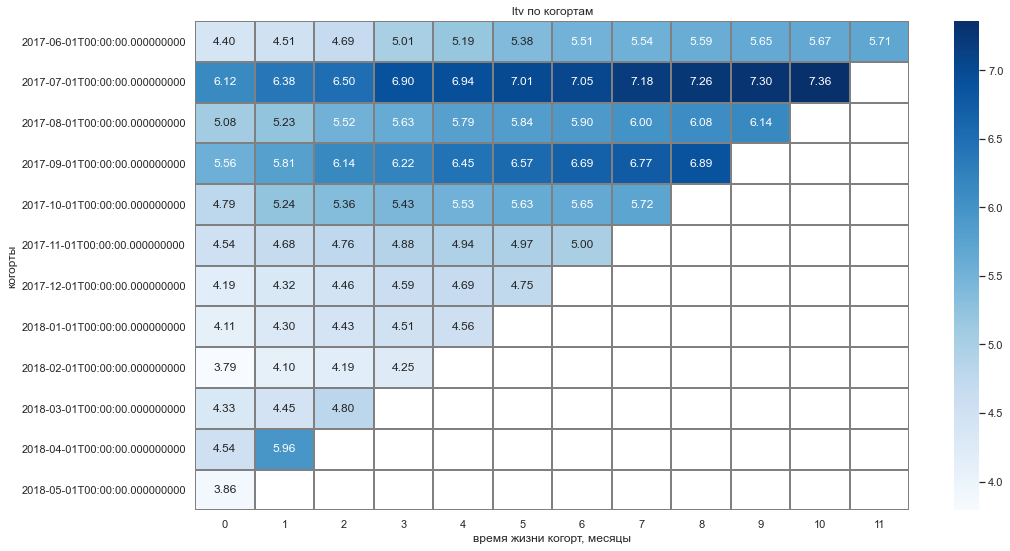

In [191]:
ltv_first_source_id(3)

Да, не по каждому виду трафика более успешна первая когорта. Хотя можно сказать, что у первой когорты везде устойчивые показатели. <br/>
Оптовые покупки являются важным фактором и их как-то пока не так много...

И давайте посчитаем судьбу каждого вида трафика целиком.

In [192]:
def romi_first_search_id(plat):
    orders_first_search_id_3 = orders_first_search_id_2.loc[orders_first_search_id_2['first_search_id'] == plat]
    orders_first_search_id_3 = orders_first_search_id_3.groupby(
        ['cohort_order_month','cohort_time']).agg(cohort_order_user_count=(
        'uid','nunique'), cohort_order_sum=('revenue','sum'), first_search_id=('first_search_id','first')).reset_index()
    initial_users_count = orders_first_search_id_3[orders_first_search_id_3['cohort_time'] == 0][['cohort_order_month', 'cohort_order_user_count']]
    columns_new = ['cohort_order_month', 'cohort_order_user_count_0']
    initial_users_count.set_axis(columns_new, axis='columns', inplace=True)
    orders_first_search_id_3 = orders_first_search_id_3.merge(initial_users_count, on=['cohort_order_month'], how = 'left')
    costs_data_month_3 = costs_data_month_2.loc[costs_data_month_2['source_id'] == plat]
    costs_data_month_3 = costs_data_month_3.groupby('cost_month').agg(cost_date_sum=('costs','sum')).reset_index()
    
    cohorts_purchase_orders_data_5 = orders_first_search_id_3.merge(
        costs_data_month_3, left_on='cohort_order_month', right_on='cost_month', how = 'left')
    
    cohorts_purchase_orders_data_5 = cohorts_purchase_orders_data_5.groupby(
        'cohort_order_month').agg(cohort_order_sum_all=('cohort_order_sum','sum')
                                  , first_search_id=('first_search_id','min'), c_ord_user_count_0=(
                                      'cohort_order_user_count_0','min'), cost_date_sum=('cost_date_sum','min')).reset_index() 
    cohorts_purchase_orders_data_5['ltv_one_client_c'] = cohorts_purchase_orders_data_5['cohort_order_sum_all'] / cohorts_purchase_orders_data_5['c_ord_user_count_0']
    cohorts_purchase_orders_data_5['cac_one_client_c'] = cohorts_purchase_orders_data_5['cost_date_sum'] / cohorts_purchase_orders_data_5['c_ord_user_count_0']
    cohorts_purchase_orders_data_5['ltv_minus_cac'] = cohorts_purchase_orders_data_5['ltv_one_client_c'] - cohorts_purchase_orders_data_5['cac_one_client_c']
    cohorts_purchase_orders_data_5['romi'] = cohorts_purchase_orders_data_5['ltv_one_client_c'] / cohorts_purchase_orders_data_5['cac_one_client_c']
    cohorts_purchase_orders_data_5['gp'] = cohorts_purchase_orders_data_5['cohort_order_sum_all'] - cohorts_purchase_orders_data_5['cost_date_sum']
    return cohorts_purchase_orders_data_5


ROMI по когортам по источнику трафика 1

In [193]:
display(romi_first_search_id(1))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,6392.39,1,190,1125.61,33.64,5.92,27.72,5.68,5266.78
1,2017-07-01,3342.52,1,160,1072.88,20.89,6.71,14.19,3.12,2269.64
2,2017-08-01,2110.91,1,113,951.81,18.68,8.42,10.26,2.22,1159.10
3,2017-09-01,2364.55,1,227,1502.01,10.42,6.62,3.80,1.57,862.54
4,2017-10-01,2850.08,1,340,2315.75,8.38,6.81,1.57,1.23,534.33
5,2017-11-01,3295.77,1,324,2445.16,10.17,7.55,2.63,1.35,850.61
6,2017-12-01,1837.71,1,330,2341.20,5.57,7.09,-1.53,0.78,-503.49
7,2018-01-01,1672.31,1,238,2186.18,7.03,9.19,-2.16,0.76,-513.87
8,2018-02-01,1683.90,1,275,2204.48,6.12,8.02,-1.89,0.76,-520.58
9,2018-03-01,3391.86,1,281,1893.09,12.07,6.74,5.33,1.79,1498.77


ROMI по когортам по источнику трафика 2

In [194]:
display(romi_first_search_id(2))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,3915.26,2,234,2427.38,16.73,10.37,6.36,1.61,1487.88
1,2017-07-01,2357.57,2,208,2333.11,11.33,11.22,0.12,1.01,24.46
2,2017-08-01,1022.69,2,122,1811.05,8.38,14.84,-6.46,0.56,-788.36
3,2017-09-01,5901.31,2,219,2985.66,26.95,13.63,13.31,1.98,2915.65
4,2017-10-01,4952.99,2,396,4845.00,12.51,12.23,0.27,1.02,107.99
5,2017-11-01,3868.50,2,398,5247.68,9.72,13.19,-3.47,0.74,-1379.18
6,2017-12-01,14111.49,2,380,4897.80,37.14,12.89,24.25,2.88,9213.69
7,2018-01-01,2261.35,2,292,4157.74,7.74,14.24,-6.49,0.54,-1896.39
8,2018-02-01,1946.47,2,293,4474.34,6.64,15.27,-8.63,0.44,-2527.87
9,2018-03-01,2456.49,2,337,3943.14,7.29,11.70,-4.41,0.62,-1486.65


ROMI по когортам по источнику трафика 9

In [195]:
display(romi_first_search_id(9))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,472.15,9,68,285.22,6.94,4.19,2.75,1.66,186.93
1,2017-07-01,366.18,9,52,302.54,7.04,5.82,1.22,1.21,63.64
2,2017-08-01,361.44,9,61,248.93,5.93,4.08,1.84,1.45,112.51
3,2017-09-01,841.22,9,87,415.62,9.67,4.78,4.89,2.02,425.60
4,2017-10-01,885.16,9,126,609.41,7.03,4.84,2.19,1.45,275.75
5,2017-11-01,656.32,9,145,683.18,4.53,4.71,-0.19,0.96,-26.86
6,2017-12-01,574.69,9,121,657.98,4.75,5.44,-0.69,0.87,-83.29
7,2018-01-01,265.12,9,80,547.16,3.31,6.84,-3.53,0.48,-282.04
8,2018-02-01,424.18,9,84,551.50,5.05,6.57,-1.52,0.77,-127.32
9,2018-03-01,447.46,9,161,480.29,2.78,2.98,-0.20,0.93,-32.83


ROMI по когортам по источнику трафика 5

In [196]:
display(romi_first_search_id(5))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,4377.64,5,384,2616.12,11.40,6.81,4.59,1.67,1761.52
1,2017-07-01,2867.87,5,423,2998.14,6.78,7.09,-0.31,0.96,-130.27
2,2017-08-01,3644.09,5,360,2185.28,10.12,6.07,4.05,1.67,1458.81
3,2017-09-01,15415.76,5,589,3849.14,26.17,6.54,19.64,4.00,11566.62
4,2017-10-01,5705.10,5,945,5767.40,6.04,6.10,-0.07,0.99,-62.30
5,2017-11-01,3607.99,5,693,6325.34,5.21,9.13,-3.92,0.57,-2717.35
6,2017-12-01,4097.47,5,771,5872.52,5.31,7.62,-2.30,0.70,-1775.05
7,2018-01-01,3363.70,5,633,5371.52,5.31,8.49,-3.17,0.63,-2007.82
8,2018-02-01,3030.74,5,678,5071.31,4.47,7.48,-3.01,0.60,-2040.57
9,2018-03-01,2586.23,5,528,4529.62,4.90,8.58,-3.68,0.57,-1943.39


ROMI по когортам по источнику трафика 4

In [197]:
display(romi_first_search_id(4))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,4992.67,4,413,3514.80,12.09,8.51,3.58,1.42,1477.87
1,2017-07-01,3246.62,4,517,3529.73,6.28,6.83,-0.55,0.92,-283.11
2,2017-08-01,2188.71,4,338,3217.36,6.48,9.52,-3.04,0.68,-1028.65
3,2017-09-01,4547.55,4,590,5192.26,7.71,8.80,-1.09,0.88,-644.71
4,2017-10-01,6024.99,4,1172,6420.84,5.14,5.48,-0.34,0.94,-395.85
5,2017-11-01,7951.94,4,1177,5388.82,6.76,4.58,2.18,1.48,2563.12
6,2017-12-01,6284.66,4,1377,7680.47,4.56,5.58,-1.01,0.82,-1395.81
7,2018-01-01,4219.05,4,1032,5832.79,4.09,5.65,-1.56,0.72,-1613.74
8,2018-02-01,4708.50,4,1106,5711.96,4.26,5.16,-0.91,0.82,-1003.46
9,2018-03-01,5133.95,4,1081,5961.87,4.75,5.52,-0.77,0.86,-827.92


ROMI по когортам по источнику трафика 10

In [198]:
display(romi_first_search_id(10))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,241.26,10,95,314.22,2.54,3.31,-0.77,0.77,-72.96
1,2017-07-01,186.12,10,51,329.82,3.65,6.47,-2.82,0.56,-143.70
2,2017-08-01,209.21,10,37,232.57,5.65,6.29,-0.63,0.90,-23.36
3,2017-09-01,226.63,10,86,460.67,2.64,5.36,-2.72,0.49,-234.04
4,2017-10-01,595.48,10,209,627.24,2.85,3.00,-0.15,0.95,-31.76
5,2017-11-01,650.69,10,127,792.36,5.12,6.24,-1.12,0.82,-141.67
6,2017-12-01,338.73,10,85,645.86,3.99,7.60,-3.61,0.52,-307.13
7,2018-01-01,292.93,10,92,614.35,3.18,6.68,-3.49,0.48,-321.42
8,2018-02-01,319.02,10,123,480.88,2.59,3.91,-1.32,0.66,-161.86
9,2018-03-01,657.44,10,186,526.41,3.53,2.83,0.70,1.25,131.03


ROMI по когортам по источнику трафика 3

In [199]:
display(romi_first_search_id(3))

,cohort_order_month,cohort_order_sum_all,first_search_id,c_ord_user_count_0,cost_date_sum,ltv_one_client_c,cac_one_client_c,ltv_minus_cac,romi,gp
0,2017-06-01,3640.32,3,638,7731.65,5.71,12.12,-6.41,0.47,-4091.33
1,2017-07-01,3761.04,3,511,7674.37,7.36,15.02,-7.66,0.49,-3913.33
2,2017-08-01,2067.99,3,337,6143.54,6.14,18.23,-12.09,0.34,-4075.55
3,2017-09-01,5379.30,3,781,9963.55,6.89,12.76,-5.87,0.54,-4584.25
4,2017-10-01,6589.65,3,1152,15737.24,5.72,13.66,-7.94,0.42,-9147.59
5,2017-11-01,6067.78,3,1213,17025.34,5.00,14.04,-9.03,0.36,-10957.56
6,2017-12-01,6240.99,3,1314,16219.52,4.75,12.34,-7.59,0.38,-9978.53
7,2018-01-01,4588.67,3,1006,14808.78,4.56,14.72,-10.16,0.31,-10220.11
8,2018-02-01,4637.69,3,1092,14228.56,4.25,13.03,-8.78,0.33,-9590.87
9,2018-03-01,4599.98,3,959,13080.85,4.80,13.64,-8.84,0.35,-8480.87


Результаты достаточно интересны по когортам по отдельному виду трафика, хотя и в целом совпадают с интегральными  результатами выше. <br/>
Очень хорошо видна необходимость отдельной работы с оптовыми покупателями. <br/>
Складывается ощущение,что работа с рекламными источниками не налажена должным образом, как с рекламными кампаниями на привлечение новых клиентов, так и с рекламными кампаниями на удержание клиентов. И, если бы это был мой коммерческий клиент, я бы безусловно не только изучил источники трафика, но и попросил бы показать мне рекламные кампании, чтобы оценить их самому, исходя из критериев привлечения и удержания. И только после этого следует принимать решение о возможном изменении структуры источников трафика и возможном перераспределении рекламного бюджета. 

<a name="chapter_4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>4. Выводы.</b> <br/>
</div>

**4.1. Изучение данных из представленного файла данных**<br/>
4.1.1. В массиве visits_log_data есть данные о 359400 клиентских сессиях; <br/>
в массиве orders_log_data есть данные о 50415 покупках;<br/>
в массиве costs_data есть данные о 2542 рекламных акциях;<br/>
пропусков нет, данные массивов вполне корректные;<br/>
типы данных тоже вполне нормальные object, int64, uint64 и float64. На такого размера таблицах нет смысла бороться за уменьшение объема памяти;<br/>
у Start Ts, End Ts, Buy Ts и dt придется менять тип данных на формат datetime;<br/>
названия столбцов также приведем к строчным и к единому виду, где необходимо.<br/>
4.1.2. Большое стандартное отклонение Revenue (std=21.82 при среднем в 5.00) и диапазон значений Revenue от 0 до 2633.28. Если учесть, что это в у.е., то надо отдельно посмотреть внимательнее на того, кто делает такой крупный заказ ))<br/>
4.1.3. Судя по всему, во временных столбцах не пишутся секунды. Стало быть, можно продолжительность создавать в минутах, но вначале это проверим.<br/><br/>
**4.2. Изучение данных конкретных столбцов и предобработка данных.**<br/>
4.2.1.Таблица visits_log_data:<br/>
Есть продолжительность в загадочные 19 секунд, 868 случаев. <br/>
В логи, преимущественно - не писались секунды. И есть артефакт в количестве 868 случаев с длительностью на длительностях не более 5 минут.<br/>
4.2.2. Об артефактах можно и сообщить технарям. В данном случае, природа этого артефакта не совсем понятна и я бы оставил эту проблему живой до объединения таблиц. А там бы посмотрел, что собой представляют эти заходы с полными данными, может что-то и прояснится. Пока видим, что это разные даты и разные часы.
Отрицательных по длительности сессий нет, что уже хорошо ))<br/>
4.2.3. Сессия в 84480 секунд, что равно 23,47 часа - тоже может быть не совсем корректным вариантом.<br/>
4.2.4. Таблица orders_log_data.<br/>
Дубликатов не видим.<br/>
Распределение количества покупок по дням не совсем похоже на те, что видел ранее - не видно таких ярких явных пиков на школьные каникулы, более сглажено.<br/>
Средняя покупка в 5 у.е. и максимальная в 2633,28 у.е. Общая сумма покупок 252057,2 у.е.<br/>
Есть покупки с нулевой суммой.<br/>
И отметим, что у нас период заканчивается 01.06.2018 и есть сколько-то покупок в этот день. Всего одна покупка в эту дату 2018-06-01. Для графиков будет более корректно, если мы не будем считать по июню 2018, не забудем ограничить массив в этом случае.<br/>
Да, есть у нас активные покупатели! Целых 239 покупок у самого активного!<br/>
Покупки с нулевой суммой в количестве 51 штуки зафиксированы в разные дни и часы. Причина появления непонятна, может быть технической. Может образоваться, например, и после возврата билетов. Просто пока запомним этот факт.<br/>
4.2.5. Таблица costs_data.<br/>
Почти каждый день у нас идет рекламная акция, они бывают 7 типов. И в этом списке нет идентификаторов 6 и 7. Учитывая, что этот список источников с затратами, то 6 и 7 у нас бесплатные источники трафика?<br/>
Получается, что дата 2018-03-31 у нас особенная, только в этот день был использован только один источник трафика и идентификатор этого источника - 5. Запомним сей факт ))<br/>
Минимальная цифра затрат у нас по единичной платной акции 0.54, а максимальная 1788.28 и средняя 129.48<br/>
Общая сумма затрат - 329131.62 у.е.<br/>
Максимальные затраты имеет источник трафика с идентификатором 3 с суммой в 141321.63 у.е. и долей в 42,9% в расходах.<br/><br/>
**4.3. Исследовательский анализ данных.**<br/>
**4.3.1. Продуктовые метрики.**<br/>
4.3.2. Исследование DAU, WAU и MAU.<br/>
Видим дни, когда происходили очень значимые изменения DAU, минимальное значение 1, максимальное 3319. Найдем эти даты и точку более 1100 в начале периода, и дату максимума перед спадом до 1. <br/>
Временные точки пиковых посещений:<br/>
session_date 	dau_date<br/>
2017-07-17 	1138<br/>
2017-10-06 	1418<br/>
2017-11-24 	3319<br/>
2018-03-25 	1545<br/>
2018-03-26 	1609<br/>
2018-03-27 	1551<br/>
Точки резкого спада, возможно падение сервиса на длительное время или длительные технологические работы:<br/>
session_date 	dau_date<br/>
2018-03-30 	131<br/>
2018-03-31 	1<br/>
Думаю, что на самом деле по посещаемости мы наблюдаем стандартную сезонную кривую. И вполне понятно, что в летний период времени у клиентов альтернативных вариантов проведения своего свободного времени горздо больше, чем в осенне-зимний период. Думаю и билетов покупают меньше, но это посмотрим далее. <br/>
4.3.3. Исследование количества сессий по отчетному периоду.<br/>
cреднее количество заходов на сайт в сутки: 1.0821696440039723<br/>
Не так много, очень малое количество клиентов заходят более одного раза в сутки.<br/>
Изменение cреднего количества заходов на сайт в сутки по отчетному периоду - наблюдается тренд на повышение данного показателя на протяжении отчетного периода, что уже радует ))<br/>
4.3.4. Исследование времени, которое пользователи проводят на сайте.<br/>
Средняя продолжительность времени на сайте: 643.506488592098<br/>
Мода равна 60с. Большинство клиентов укладывается в 60с.<br/>
Средняя длительность сессий на девайсе desktop равна 703,95с, а на девайсе touch 479,62, различается в 1,47 раза.<br/>
Хотя моды на девайсах и не различаются, но довольно хорошо видно, что длительность сессии у десктопных устройств выше, если она вышла за пределы 1 минуты.<br/>
4.3.5. Retention Rate и когортный анализ.<br/>
Уникальных uid у нас 228169 из общего количества в 359400 записей. <br/>
Показатель удержания падает для каждой когорты. Но это тоже похоже на сезонные причины, это же уже май.<br/>
Резко выделяется первая когорта. Пока причина непонятна, могут быть акции, особенно для оптовиков. У когорты 09.2017 самый лучший старт, 8,55% - можно ассоциировать с началом учебного года.<br/>
И месяц ноябрь - тоже успешен, видимо по причине покупки билетов к Новому году.<br/>
В июне 2017 была такая акция - «Лето с Яндекс.Афишей: скидки на билеты на летние концерты до 40%», может это быть причиной? Старт продаж по акции был был 21 июня 2017, посмотрим позже по продаже билетов...<br/>
https://kudago.com/msk/event/aktsiya-leto-s-yandeksafishej-2017/<br/>
https://ru.wikipedia.org/wiki/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81.%D0%90%D1%84%D0%B8%D1%88%D0%B0<br/>
**4.4.1. Метрики электронной коммерции.**<br/>
4.4.2. Исследование метрики среднего времени с момента первого посещения сайта до совершения покупки <br/>
16.000859012398706<br/>
Всего 16% хотя бы один раз сделали покупку. Не так и мало, кстати. Вполне приличный показатель.<br/>
Большинство покупает в первую минуту, по медиане за 16 минут, а в среднем - 249 минут. И есть уникумы, что берут через 24 часа. Посмотрели их внимательнее: таких у нас 567 человек.<br/>
Разное время, разные суммы покупок у таких - похожи на естественных покупателей. Может, на сутки можно бронировать билеты? Посмотрим на сервисе.<br/>
Оплату необходимо завершить в течение 15 минут, так сказано в справке у Яндекс.Афиши,<br/>
https://yandex.ru/support/afisha/theatre-ticket.html#q1<br/>
И вспомним про странные заходы длительностью в 19с, что выплывали выше? 1964 - таких. Все они  с покупками оказались. Интересно, в чем причина таких быстрых покупок? Будем думать...<br/>
Смотрим, сколько заходов и какой общей длительности с разных девайсов:<br/>
count_duration 	sum_duration<br/>
device 		<br/>
desktop 	262567 	184833246<br/>
touch 	96833 	46442986<br/>
Явный перевес на стороне десктопных устройств, доли по количеству заходов 73,1 и 26,9%. И еще больший по общей продолжительности пребывания, доли 79,9 и 20,1%. Несколько неожиданно, но мы рассматриваем еще 2017-2018г.г.<br/>
4.4.3. Cреднее количество покупок на одного покупателя за определённый период.<br/>
У нас есть хорошие оптовые покупатели, есть и которые купили на сумму более 10 тыс. у.е. И таких целых двое!<br/>
Видим, что количество покупающих в каждой когорте уже на второй месяц ее жизни падает более, чем на порядок. В первую очереди из-за низкой возвращаемости когорты. Первая когорта опять с лучшими результатами.<br/>
Думаю, что просто в первую когорту попали все оптовые покупатели, существующие до того времени на сервисе. Поэтому и ее качество выше.<br/>
4.4.4. Cредний чек.<br/>
Средний чек на протяжении отчетного периода не имеет значимых изменений и колеблется от 44,24 до 71,95 у.е.<br/>
4.4.5. LTV на покупателя по когортам.<br/>
Обратим внимание, что в некоторых когортах есть приличные суммарные продажи уже не в первые месяцы жизни, от 4054,70 до 10261,52 у.е. Скорее всего - есть и вновь появившиеся оптовики в этих когортах... И лидерство первой когорты расстает...<br/>
Лидерами являются когорты:<br/>
2017-09-01 с суммой 3476,32;<br/>
2017-12-01 с суммой 33485,73;<br/>
2017-10-01 с суммой 27603,45<br/>
Причины - лучший старт когорты или необычная рекордная сумма за промежуточный месяц.<br/>
**4.5. Маркетинговые метрики.**<br/>
4.5.1. Общая сумма расходов на маркетинг <br/>
Общая сумма затрат - 329131.62 у.е. И это при общей сумме покупок в 252057,2 у.е. Сложная история...<br/>
Пока можно выделить пиковую реакцию на пиковые затраты и это очень похоже на реакцию, когда по всем источникам идет реклама определенной акции, назначенной на определенную дату.<br/>
И сильной корреляции затрат, покупок и посещаемости тоже не вижу, все накладывается на более сильную стандартную сезонность. <br/>
4.5.2. Средний CAC на одного покупателя для всего проекта и для каждого источника трафика. <br/>
Если судить об эффективности, как соотношению суммарных покупок к суммарным затратам, то источники трафика ранжировали по атрибуции первого перехода.<br/>
Но не зная характера источников трафика и их масштабируемости сложно судить о правильности распределения рекоамного бюджета.<br/>
Основные вопросы возникают к источнику трафика под номером 3. Он у нас самый большой по затратам и самый низкий по коэффициенту отдачи. При затратах в 141321,63 и покупках в 54511,24 имеет коэффициент 0,39.<br/>
Ну а в лидерах источник 1, При затратах в 20833,27 и покупках в 31090,55 имеет коэффициент 1,49.<br/>
Посчитали тот же CAC с точки зрения стоимости привлечения прибыли за счет расходов по каждому источнику трафика, атрибуция первого перехода:<br/>
Лидером источник 1, имеет прибыль в 10257,28. Источник 3 имеет убыток -86810,39. Но это опять же не повод махать шашкой и резать бюджет данного источника, атрибуция может быть разной и многоканальной. Да и кросс-девайс надо бы при этом смотреть.<br/>
Если считать, что вся сумма затрат у нас тратится каждый месяц только на привлечение клиентов когорты этого месяца, что не совсем верно, то можем сказать, что рентабельными оказались только когорты: 2017-06-01 и 2017-09-01<br/>
4.5.3. ROMI по когортам в разрезе источников. <br/>
Платные источники 1, 2, 9, 5 - рентабельны, 4, 10 и 3 - убыточны. Но для выводов мне не хватает знания источников трафика, акцентов проводимых рекламных кампаний и еще некоторых характеристик, типа кросс-девайс, кросс-источник трафика и прочее. Надо более полно смотреть.<br/>
И, главное - нет данных о возможной масштабируемости источников трафика. Без этого знания - что можно советовать?<br/>
Да, не по каждому виду трафика более успешна первая когорта. Хотя можно сказать, что у первой когорты везде устойчивые показатели.<br/>
Оптовые покупки являются важным фактором и их как-то пока не так много...<br/>
Результаты достаточно интересны по когортам по отдельному виду трафика, хотя и в целом совпадают с интегральными результатами выше.<br/>
Очень хорошо видна необходимость отдельной работы с оптовыми покупателями.<br/><br/>
<b>Складывается ощущение,что работа с рекламными источниками не налажена должным образом, как с рекламными кампаниями на привлечение новых клиентов, так и с рекламными кампаниями на удержание клиентов. И, если бы это был мой коммерческий клиент, я бы безусловно не только изучил источники трафика, но и попросил бы показать мне рекламные кампании, чтобы оценить их самому, исходя из критериев привлечения и удержания. И только после этого следует принимать решение о возможном изменении структуры источников трафика и возможном перераспределении рекламного бюджета.</b>

